In [1]:
#pip install scikeras

In [2]:
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec
import seaborn as sns
import os as os
import matplotlib.pyplot as plt
import gc 
from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Lasso, SGDRegressor, SGDClassifier, Ridge
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier
from sklearn.model_selection import (RandomizedSearchCV,GridSearchCV, TimeSeriesSplit, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)
from sklearn import linear_model
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn import preprocessing
from zipfile import ZipFile
from sklearn import metrics, tree
from sklearn.metrics import classification_report, confusion_matrix
from statsmodels.tools.eval_measures import mse, rmse
import itertools
import warnings
from sklearn.compose import TransformedTargetRegressor
import time
import plotly.express as px
from scipy.stats import poisson
from keras import models
from keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [3]:
from scikeras.wrappers import KerasRegressor
from tensorflow import keras
from typing import Dict, Iterable, Any
from keras.callbacks import History 

In [457]:
def glimpse(df):
    print(f"{df.shape[0]} rows and {df.shape[1]} columns")
    display(df.head())
    display(df.tail())

In [5]:
df_Ire = pd.concat([pd.read_csv('1991-2004.csv'),pd.read_csv('2005-2014.csv'),pd.read_csv('2015-2021.csv')])

In [458]:
glimpse(df_Ire)

1302 rows and 13 columns


,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.916,1140.468,1,0,0,0,0,0,0
1,Border,Total sheep,1991,1402.8,8.916,1140.468,1,0,0,0,0,0,0
2,Border,Total pigs,1991,304.5,8.916,1140.468,1,0,0,0,0,0,0
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468,1,0,0,0,0,0,0
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468,1,0,0,0,0,0,0


,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
1297,Midland,Total sheep,2021,374.3,9.745,955.885,0,0,0,1,0,0,0
1298,Midland,Total pigs,2021,186.4,9.745,955.885,0,0,0,1,0,0,0
1299,Midland,Total horses and ponies,2021,8.6,9.745,955.885,0,0,0,1,0,0,0
1300,Midland,"Total mules, jennets and asses",2021,0.5,9.745,955.885,0,0,0,1,0,0,0
1301,Midland,Total goats,2021,0.8,9.745,955.885,0,0,0,1,0,0,0


In [8]:
df_Ire = df_Ire.drop(["Statistic Label", "STATISTIC Label","UNIT"], axis=1) #drop columns

In [459]:
glimpse(df_Ire)

1302 rows and 13 columns


,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.916,1140.468,1,0,0,0,0,0,0
1,Border,Total sheep,1991,1402.8,8.916,1140.468,1,0,0,0,0,0,0
2,Border,Total pigs,1991,304.5,8.916,1140.468,1,0,0,0,0,0,0
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468,1,0,0,0,0,0,0
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468,1,0,0,0,0,0,0


,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
1297,Midland,Total sheep,2021,374.3,9.745,955.885,0,0,0,1,0,0,0
1298,Midland,Total pigs,2021,186.4,9.745,955.885,0,0,0,1,0,0,0
1299,Midland,Total horses and ponies,2021,8.6,9.745,955.885,0,0,0,1,0,0,0
1300,Midland,"Total mules, jennets and asses",2021,0.5,9.745,955.885,0,0,0,1,0,0,0
1301,Midland,Total goats,2021,0.8,9.745,955.885,0,0,0,1,0,0,0


In [11]:
df_Ire.rename(columns = {'VALUE':'Quantity'}, inplace = True)

In [12]:
df_Ire.head()

,Region,Type of Animal,Year,Quantity
0,Border,Total cattle,1991,916.5
1,Border,Total cattle,1992,924.3
2,Border,Total cattle,1993,928.4
3,Border,Total cattle,1994,934.0
4,Border,Total cattle,1995,933.6


In [13]:
df_Ire.duplicated().sum()

0

In [14]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West', 'Dublin and Mid-East'], dtype=object)

In [15]:
df_Ire['Region'] = df_Ire['Region'].str.replace('Dublin and Mid-East', 'Dublin plus Mid East',regex = True)

In [16]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [17]:
df_Ire.Year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [18]:
df_Ire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 293
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1302 non-null   object 
 1   Type of Animal  1302 non-null   object 
 2   Year            1302 non-null   int64  
 3   Quantity        1302 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 50.9+ KB


In [19]:
df_Ire.isnull().sum()

Region            0
Type of Animal    0
Year              0
Quantity          0
dtype: int64

In [20]:
df_Ire.shape

(1302, 4)

In [21]:
df_Ire.Quantity.describe()

count    1302.000000
mean      362.713210
std       497.233292
min         0.300000
25%         1.800000
50%        26.900000
75%       699.975000
max      2192.700000
Name: Quantity, dtype: float64

In [22]:
df_Ire.count()

Region            1302
Type of Animal    1302
Year              1302
Quantity          1302
dtype: int64

In [23]:
df_Ire.Quantity.skew(axis = 0)

1.2651456127634129

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


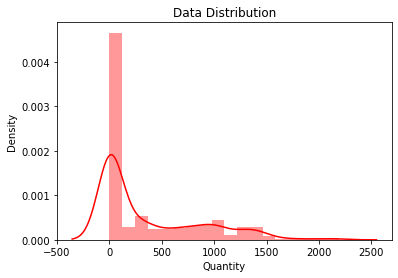

In [24]:
sns.distplot(df_Ire.Quantity, hist=True, color="r", label="Fitted Values")


plt.title('Data Distribution')

plt.show()
plt.close()
sns.set_style("darkgrid")

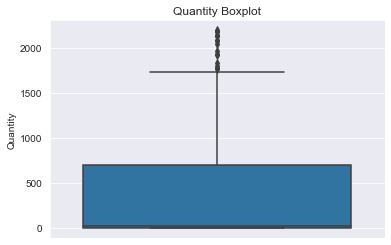

In [25]:
sns.boxplot(y=df_Ire.Quantity); #boxplot graph showing the quantity of outliers present in our data
plt.title('Quantity Boxplot')
sns.set_style("darkgrid")

In [26]:
df_Ire.groupby(['Year'],sort = False)['Quantity'].sum().reset_index()

,Year,Quantity
0,1991,17191.9
1,1992,17326.2
2,1993,17222.3
3,1994,17022.3
4,1995,17006.5
5,1996,16915.1
6,1997,17458.1
7,1998,17865.9
8,1999,17195.8
9,2000,16397.9


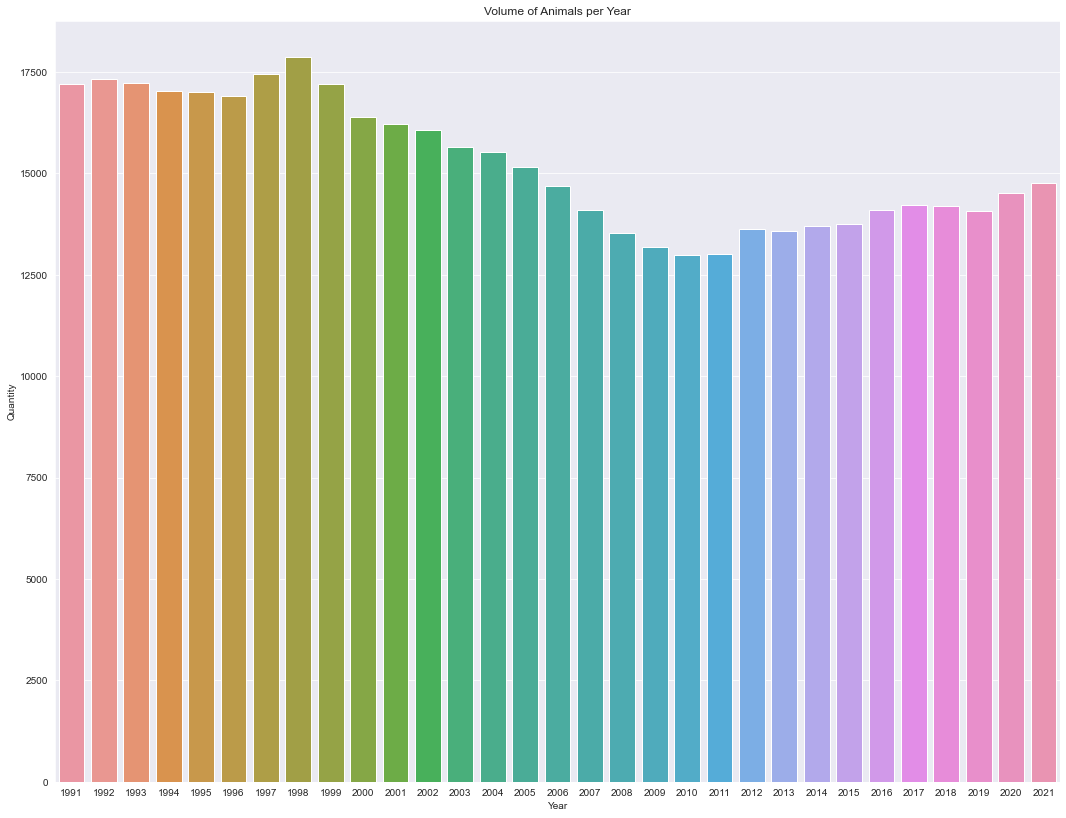

In [27]:
plt.figure(figsize=(18,14))
ax = sns.barplot(x = 'Year', y = 'Quantity', ci = None, data = df_Ire, estimator=sum)
plt.title('Volume of Animals per Year')
sns.set_style("darkgrid")

In [461]:
df_Ire_mean_temps = pd.read_csv('ireland_mean_temps_1901-2021.csv',skiprows=1)

In [462]:
glimpse(df_Ire_mean_temps)

121 rows and 29 columns


,Unnamed: 0,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,8.84,8.85,8.36,9.33,9.31,8.03,8.74,8.91,9.29,...,8.42,8.42,8.70,8.58,8.26,8.84,9.08,8.60,9.26,8.78
1,1902,8.86,8.89,8.33,9.39,9.40,7.91,8.72,8.93,9.36,...,8.30,8.30,8.72,8.59,8.26,8.91,9.13,8.60,9.30,8.80
2,1903,8.82,8.88,8.28,9.33,9.35,7.89,8.68,8.86,9.31,...,8.29,8.29,8.67,8.52,8.19,8.87,9.12,8.54,9.31,8.78
3,1904,8.80,8.87,8.27,9.30,9.32,7.91,8.68,8.84,9.29,...,8.29,8.29,8.65,8.51,8.18,8.85,9.09,8.53,9.28,8.76
4,1905,9.01,9.04,8.53,9.49,9.49,8.16,8.93,9.08,9.46,...,8.56,8.56,8.88,8.76,8.43,9.03,9.27,8.78,9.45,8.96


,Unnamed: 0,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,10.00,10.03,9.53,10.48,10.48,9.18,9.97,10.06,10.44,...,9.55,9.55,9.86,9.74,9.41,10.01,10.25,9.76,10.45,9.98
117,2018,9.70,9.74,9.23,10.17,10.18,8.85,9.68,9.75,10.14,...,9.25,9.25,9.55,9.42,9.11,9.71,9.95,9.46,10.17,9.68
118,2019,9.87,9.88,9.40,10.35,10.34,9.08,9.83,9.93,10.32,...,9.44,9.44,9.72,9.61,9.29,9.87,10.11,9.63,10.31,9.84
119,2020,9.79,9.82,9.31,10.26,10.26,8.97,9.77,9.84,10.23,...,9.34,9.34,9.64,9.51,9.18,9.79,10.04,9.54,10.27,9.78
120,2021,9.95,9.96,9.47,10.43,10.43,9.12,9.89,10.02,10.40,...,9.49,9.49,9.80,9.69,9.37,9.95,10.19,9.70,10.38,9.90


In [463]:
df_Ire_mean_temps.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

In [464]:
df_Ire_mean_temps.head()

,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,8.84,8.85,8.36,9.33,9.31,8.03,8.74,8.91,9.29,...,8.42,8.42,8.70,8.58,8.26,8.84,9.08,8.60,9.26,8.78
1,1902,8.86,8.89,8.33,9.39,9.40,7.91,8.72,8.93,9.36,...,8.30,8.30,8.72,8.59,8.26,8.91,9.13,8.60,9.30,8.80
2,1903,8.82,8.88,8.28,9.33,9.35,7.89,8.68,8.86,9.31,...,8.29,8.29,8.67,8.52,8.19,8.87,9.12,8.54,9.31,8.78
3,1904,8.80,8.87,8.27,9.30,9.32,7.91,8.68,8.84,9.29,...,8.29,8.29,8.65,8.51,8.18,8.85,9.09,8.53,9.28,8.76
4,1905,9.01,9.04,8.53,9.49,9.49,8.16,8.93,9.08,9.46,...,8.56,8.56,8.88,8.76,8.43,9.03,9.27,8.78,9.45,8.96


In [33]:
df_Ire_mean_temps = df_Ire_mean_temps[df_Ire_mean_temps['Year'] >= 1991]

In [36]:
df_Ire_mean_temps = df_Ire_mean_temps.drop(["Ireland"], axis=1) #drop columns

In [465]:
glimpse(df_Ire_mean_temps)

121 rows and 29 columns


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,8.84,8.85,8.36,9.33,9.31,8.03,8.74,8.91,9.29,...,8.42,8.42,8.70,8.58,8.26,8.84,9.08,8.60,9.26,8.78
1,1902,8.86,8.89,8.33,9.39,9.40,7.91,8.72,8.93,9.36,...,8.30,8.30,8.72,8.59,8.26,8.91,9.13,8.60,9.30,8.80
2,1903,8.82,8.88,8.28,9.33,9.35,7.89,8.68,8.86,9.31,...,8.29,8.29,8.67,8.52,8.19,8.87,9.12,8.54,9.31,8.78
3,1904,8.80,8.87,8.27,9.30,9.32,7.91,8.68,8.84,9.29,...,8.29,8.29,8.65,8.51,8.18,8.85,9.09,8.53,9.28,8.76
4,1905,9.01,9.04,8.53,9.49,9.49,8.16,8.93,9.08,9.46,...,8.56,8.56,8.88,8.76,8.43,9.03,9.27,8.78,9.45,8.96


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,10.00,10.03,9.53,10.48,10.48,9.18,9.97,10.06,10.44,...,9.55,9.55,9.86,9.74,9.41,10.01,10.25,9.76,10.45,9.98
117,2018,9.70,9.74,9.23,10.17,10.18,8.85,9.68,9.75,10.14,...,9.25,9.25,9.55,9.42,9.11,9.71,9.95,9.46,10.17,9.68
118,2019,9.87,9.88,9.40,10.35,10.34,9.08,9.83,9.93,10.32,...,9.44,9.44,9.72,9.61,9.29,9.87,10.11,9.63,10.31,9.84
119,2020,9.79,9.82,9.31,10.26,10.26,8.97,9.77,9.84,10.23,...,9.34,9.34,9.64,9.51,9.18,9.79,10.04,9.54,10.27,9.78
120,2021,9.95,9.96,9.47,10.43,10.43,9.12,9.89,10.02,10.40,...,9.49,9.49,9.80,9.69,9.37,9.95,10.19,9.70,10.38,9.90


In [37]:
df_Ire_mean_temps.head()

,Year,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
90,1991,9.53,9.04,10.01,9.98,8.66,9.39,9.59,9.96,9.46,...,9.04,9.04,9.39,9.27,8.96,9.53,9.74,9.28,9.88,9.43
91,1992,9.48,8.98,9.93,9.93,8.61,9.36,9.51,9.91,9.39,...,9.00,9.00,9.32,9.18,8.87,9.47,9.71,9.21,9.89,9.41
92,1993,9.32,8.75,9.80,9.80,8.36,9.11,9.37,9.78,9.19,...,8.75,8.75,9.15,9.02,8.70,9.31,9.54,9.02,9.70,9.18
93,1994,9.52,8.97,9.98,10.03,8.59,9.37,9.55,9.97,9.41,...,8.97,8.97,9.35,9.21,8.89,9.52,9.77,9.24,9.98,9.45
94,1995,10.07,9.48,10.52,10.54,9.05,9.94,10.09,10.51,9.96,...,9.45,9.45,9.89,9.74,9.38,10.07,10.33,9.77,10.54,10.03


In [467]:
df_Ire_mean_temps = df_Ire_mean_temps.melt(id_vars=["Year"], 
        var_name="County", 
        value_name="Mean_Temperature")

In [468]:
glimpse(df_Ire_mean_temps)

3388 rows and 3 columns


,Year,County,Mean_Temperature
0,1901,Ireland,8.84
1,1902,Ireland,8.86
2,1903,Ireland,8.82
3,1904,Ireland,8.80
4,1905,Ireland,9.01


,Year,County,Mean_Temperature
3383,2017,Wicklow,9.98
3384,2018,Wicklow,9.68
3385,2019,Wicklow,9.84
3386,2020,Wicklow,9.78
3387,2021,Wicklow,9.90


In [41]:
df_Regions = pd.read_excel('Nuts_regions.xlsx',usecols = ['NUTS 3 Name','County'])

In [470]:
glimpse(df_Regions)

26 rows and 2 columns


,Region,County
0,Border,Donegal
1,Border,Sligo
2,Border,Leitrim
3,Border,Cavan
4,Border,Monaghan


,Region,County
21,Mid-East,Louth
22,Midlands,Longford
23,Midlands,Westmeath
24,Midlands,Offaly
25,Midlands,Laois


In [471]:
df_Regions.rename(columns = {'NUTS 3 Name':'Region'}, inplace = True)

In [472]:
df_Regions.head()

,Region,County
0,Border,Donegal
1,Border,Sligo
2,Border,Leitrim
3,Border,Cavan
4,Border,Monaghan


In [475]:
df_Ire_mean_temps = pd.merge(df_Ire_mean_temps, df_Regions, how="inner", on=["County"])

In [476]:
glimpse(df_Ire_mean_temps)

3146 rows and 4 columns


,Year,County,Mean_Temperature,Region
0,1901,Carlow,8.85,South East
1,1902,Carlow,8.89,South East
2,1903,Carlow,8.88,South East
3,1904,Carlow,8.87,South East
4,1905,Carlow,9.04,South East


,Year,County,Mean_Temperature,Region
3141,2017,Wicklow,9.98,Mid-East
3142,2018,Wicklow,9.68,Mid-East
3143,2019,Wicklow,9.84,Mid-East
3144,2020,Wicklow,9.78,Mid-East
3145,2021,Wicklow,9.90,Mid-East


In [477]:
df_Ire_mean_temps['Region'] = df_Ire_mean_temps['Region'].str.replace('Dublin', 'Dublin plus Mid East',regex = True)
df_Ire_mean_temps['Region'] = df_Ire_mean_temps['Region'].str.replace('Mid-East', 'Dublin plus Mid East',regex = True)

In [478]:
df_Ire_mean_temps = df_Ire_mean_temps.groupby(['Region','Year'],sort = False)['Mean_Temperature'].mean().reset_index()

In [479]:
glimpse(df_Ire_mean_temps)

847 rows and 3 columns


,Region,Year,Mean_Temperature
0,South East,1901,9.0150
1,South East,1902,9.0600
2,South East,1903,9.0550
3,South East,1904,9.0325
4,South East,1905,9.2050


,Region,Year,Mean_Temperature
842,Midlands,2017,9.8100
843,Midlands,2018,9.5050
844,Midlands,2019,9.6775
845,Midlands,2020,9.5875
846,Midlands,2021,9.7450


In [480]:
df_Ire_prec = pd.read_csv('ireland_precipitation_1901-2021.csv',skiprows=1)

In [481]:
df_Ire_prec.head()

,Unnamed: 0,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,1068.52,983.20,1018.93,1055.24,1153.06,1288.02,942.31,1044.95,1323.52,...,933.47,933.47,851.14,1008.41,1206.83,1030.92,1129.96,901.61,988.85,978.16
1,1902,1016.31,965.42,939.44,1004.48,1119.44,1167.77,934.83,984.17,1277.05,...,864.39,864.39,831.83,943.86,1087.75,1002.13,1101.99,852.81,967.98,966.45
2,1903,1368.16,1282.10,1235.62,1376.31,1525.32,1564.40,1197.84,1350.96,1747.10,...,1131.68,1131.68,1116.15,1280.60,1479.39,1355.40,1484.59,1134.94,1275.17,1256.88
3,1904,1081.95,970.03,985.97,1114.46,1235.12,1282.28,902.41,1069.77,1421.42,...,906.37,906.37,840.18,1003.16,1173.82,1041.08,1144.26,873.39,974.31,950.28
4,1905,957.80,850.82,898.77,963.50,1064.98,1181.87,815.87,946.80,1230.65,...,821.47,821.47,745.23,898.72,1071.46,910.80,1000.54,783.38,861.72,851.38


In [482]:
df_Ire_prec.rename(columns = {'Unnamed: 0':'Year'}, inplace = True)

In [483]:
glimpse(df_Ire_prec)

121 rows and 29 columns


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
0,1901,1068.52,983.20,1018.93,1055.24,1153.06,1288.02,942.31,1044.95,1323.52,...,933.47,933.47,851.14,1008.41,1206.83,1030.92,1129.96,901.61,988.85,978.16
1,1902,1016.31,965.42,939.44,1004.48,1119.44,1167.77,934.83,984.17,1277.05,...,864.39,864.39,831.83,943.86,1087.75,1002.13,1101.99,852.81,967.98,966.45
2,1903,1368.16,1282.10,1235.62,1376.31,1525.32,1564.40,1197.84,1350.96,1747.10,...,1131.68,1131.68,1116.15,1280.60,1479.39,1355.40,1484.59,1134.94,1275.17,1256.88
3,1904,1081.95,970.03,985.97,1114.46,1235.12,1282.28,902.41,1069.77,1421.42,...,906.37,906.37,840.18,1003.16,1173.82,1041.08,1144.26,873.39,974.31,950.28
4,1905,957.80,850.82,898.77,963.50,1064.98,1181.87,815.87,946.80,1230.65,...,821.47,821.47,745.23,898.72,1071.46,910.80,1000.54,783.38,861.72,851.38


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,1174.26,1062.72,1119.19,1153.20,1273.88,1479.77,1018.30,1151.08,1465.66,...,1024.69,1024.69,923.08,1104.78,1349.56,1111.37,1225.02,976.72,1074.69,1058.49
117,2018,1206.47,1076.11,1119.95,1205.06,1350.70,1464.49,1018.71,1182.57,1569.17,...,1016.81,1016.81,932.81,1115.87,1361.69,1155.06,1263.93,982.17,1108.28,1073.62
118,2019,1289.40,1150.00,1224.10,1284.32,1398.04,1571.72,1102.75,1281.50,1616.96,...,1120.99,1120.99,1020.94,1222.75,1483.84,1229.87,1335.88,1075.76,1169.89,1147.99
119,2020,1351.05,1212.33,1266.13,1337.43,1493.93,1684.96,1149.55,1322.36,1725.47,...,1159.82,1159.82,1050.53,1257.39,1538.96,1287.01,1421.91,1103.99,1239.32,1203.76
120,2021,1147.14,1068.08,1079.62,1121.59,1270.53,1383.32,997.33,1110.63,1454.64,...,986.83,986.83,905.47,1062.87,1288.10,1104.29,1226.74,948.43,1089.05,1054.35


In [484]:
df_Ire_prec = df_Ire_prec[df_Ire_prec['Year'] >= 1991]

In [485]:
glimpse(df_Ire_prec)

31 rows and 29 columns


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
90,1991,1070.58,971.41,998.31,1058.94,1152.03,1357.46,894.17,1063.22,1337.35,...,879.12,879.12,845.49,1019.66,1255.82,1009.88,1102.16,883.78,989.58,958.22
91,1992,1129.81,919.76,1096.77,1128.06,1172.19,1564.67,882.89,1170.42,1382.13,...,996.74,996.74,855.43,1122.93,1431.71,1017.57,1082.40,920.07,937.17,911.00
92,1993,1229.93,1180.35,1165.81,1204.21,1335.58,1473.89,1109.07,1171.49,1511.19,...,1063.93,1063.93,1000.95,1139.63,1366.33,1198.42,1321.46,1047.61,1194.10,1169.39
93,1994,1309.49,1203.84,1153.12,1332.03,1494.87,1522.62,1085.57,1280.40,1713.78,...,1019.94,1019.94,1030.63,1191.71,1449.58,1291.33,1430.50,1051.15,1246.21,1170.08
94,1995,1155.17,1044.02,1097.47,1141.69,1255.03,1419.07,971.23,1135.98,1468.34,...,996.60,996.60,913.06,1088.36,1331.32,1093.12,1194.47,966.30,1059.92,1022.80


,Year,Ireland,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
116,2017,1174.26,1062.72,1119.19,1153.20,1273.88,1479.77,1018.30,1151.08,1465.66,...,1024.69,1024.69,923.08,1104.78,1349.56,1111.37,1225.02,976.72,1074.69,1058.49
117,2018,1206.47,1076.11,1119.95,1205.06,1350.70,1464.49,1018.71,1182.57,1569.17,...,1016.81,1016.81,932.81,1115.87,1361.69,1155.06,1263.93,982.17,1108.28,1073.62
118,2019,1289.40,1150.00,1224.10,1284.32,1398.04,1571.72,1102.75,1281.50,1616.96,...,1120.99,1120.99,1020.94,1222.75,1483.84,1229.87,1335.88,1075.76,1169.89,1147.99
119,2020,1351.05,1212.33,1266.13,1337.43,1493.93,1684.96,1149.55,1322.36,1725.47,...,1159.82,1159.82,1050.53,1257.39,1538.96,1287.01,1421.91,1103.99,1239.32,1203.76
120,2021,1147.14,1068.08,1079.62,1121.59,1270.53,1383.32,997.33,1110.63,1454.64,...,986.83,986.83,905.47,1062.87,1288.10,1104.29,1226.74,948.43,1089.05,1054.35


In [486]:
df_Ire_prec = df_Ire_prec.drop(["Ireland"], axis=1) #drop columns

In [487]:
df_Ire_prec.head()

,Year,Carlow,Cavan,Clare,Cork,Donegal,Dublin,Galway,Kerry,Kildare,...,Monaghan,Munster,Offaly,Roscommon,Sligo,Tipperary,Waterford,Westmeath,Wexford,Wicklow
90,1991,971.41,998.31,1058.94,1152.03,1357.46,894.17,1063.22,1337.35,845.91,...,879.12,879.12,845.49,1019.66,1255.82,1009.88,1102.16,883.78,989.58,958.22
91,1992,919.76,1096.77,1128.06,1172.19,1564.67,882.89,1170.42,1382.13,833.95,...,996.74,996.74,855.43,1122.93,1431.71,1017.57,1082.40,920.07,937.17,911.00
92,1993,1180.35,1165.81,1204.21,1335.58,1473.89,1109.07,1171.49,1511.19,1022.00,...,1063.93,1063.93,1000.95,1139.63,1366.33,1198.42,1321.46,1047.61,1194.10,1169.39
93,1994,1203.84,1153.12,1332.03,1494.87,1522.62,1085.57,1280.40,1713.78,1021.11,...,1019.94,1019.94,1030.63,1191.71,1449.58,1291.33,1430.50,1051.15,1246.21,1170.08
94,1995,1044.02,1097.47,1141.69,1255.03,1419.07,971.23,1135.98,1468.34,908.18,...,996.60,996.60,913.06,1088.36,1331.32,1093.12,1194.47,966.30,1059.92,1022.80


In [488]:
df_Ire_prec = df_Ire_prec.melt(id_vars=["Year"], 
        var_name="County", 
        value_name="Precipitation")

In [489]:
glimpse(df_Ire_prec)

837 rows and 3 columns


,Year,County,Precipitation
0,1991,Carlow,971.41
1,1992,Carlow,919.76
2,1993,Carlow,1180.35
3,1994,Carlow,1203.84
4,1995,Carlow,1044.02


,Year,County,Precipitation
832,2017,Wicklow,1058.49
833,2018,Wicklow,1073.62
834,2019,Wicklow,1147.99
835,2020,Wicklow,1203.76
836,2021,Wicklow,1054.35


In [490]:
df_Ire_prec = pd.merge(df_Ire_prec, df_Regions, how="inner", on=["County"])

In [491]:
glimpse(df_Ire_prec)

806 rows and 4 columns


,Year,County,Precipitation,Region
0,1991,Carlow,971.41,South East
1,1992,Carlow,919.76,South East
2,1993,Carlow,1180.35,South East
3,1994,Carlow,1203.84,South East
4,1995,Carlow,1044.02,South East


,Year,County,Precipitation,Region
801,2017,Wicklow,1058.49,Mid-East
802,2018,Wicklow,1073.62,Mid-East
803,2019,Wicklow,1147.99,Mid-East
804,2020,Wicklow,1203.76,Mid-East
805,2021,Wicklow,1054.35,Mid-East


In [492]:
df_Ire_prec['Region'] = df_Ire_prec['Region'].str.replace('Dublin', 'Dublin plus Mid East',regex = True)
df_Ire_prec['Region'] = df_Ire_prec['Region'].str.replace('Mid-East', 'Dublin plus Mid East',regex = True)

In [493]:
df_Ire_prec = df_Ire_prec.groupby(['Region','Year'],sort = False)['Precipitation'].mean().reset_index()

In [494]:
glimpse(df_Ire_prec)

217 rows and 3 columns


,Region,Year,Precipitation
0,South East,1991,997.3375
1,South East,1992,961.9000
2,South East,1993,1205.8300
3,South East,1994,1264.9000
4,South East,1995,1074.4150


,Region,Year,Precipitation
212,Midlands,2017,979.7000
213,Midlands,2018,989.0125
214,Midlands,2019,1080.8425
215,Midlands,2020,1113.9775
216,Midlands,2021,955.8850


In [495]:
df_Ire_weather = pd.merge(df_Ire_mean_temps, df_Ire_prec, how="inner", on=["Region","Year"])

In [496]:
glimpse(df_Ire_weather)

217 rows and 4 columns


,Region,Year,Mean_Temperature,Precipitation
0,South East,1991,9.6725,997.3375
1,South East,1992,9.6475,961.9000
2,South East,1993,9.4775,1205.8300
3,South East,1994,9.7075,1264.9000
4,South East,1995,10.2650,1074.4150


,Region,Year,Mean_Temperature,Precipitation
212,Midlands,2017,9.8100,979.7000
213,Midlands,2018,9.5050,989.0125
214,Midlands,2019,9.6775,1080.8425
215,Midlands,2020,9.5875,1113.9775
216,Midlands,2021,9.7450,955.8850


In [497]:
df_Ire_weather.Region.unique()

array(['South East', 'Border', 'Mid-west', 'South-West',
       'Dublin plus Mid East', 'West', 'Midlands'], dtype=object)

In [498]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [499]:
df_Ire_weather['Region'] = df_Ire_weather['Region'].str.replace('South East', 'South-East',regex = True)
df_Ire_weather['Region'] = df_Ire_weather['Region'].str.replace('Midlands', 'Midland',regex = True)
df_Ire_weather['Region'] = df_Ire_weather['Region'].str.replace('Mid-west', 'Mid-West',regex = True)

In [500]:
df_Ire_weather.Region.unique()

array(['South-East', 'Border', 'Mid-West', 'South-West',
       'Dublin plus Mid East', 'West', 'Midland'], dtype=object)

In [501]:
df_Ire.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [502]:
df_Ire = pd.merge(df_Ire, df_Ire_weather, how="inner", on=["Region","Year"])

In [503]:
glimpse(df_Ire)

1302 rows and 15 columns


,Region,Type of Animal,Year,Quantity,Mean_Temperature_x,Precipitation_x,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,Mean_Temperature_y,Precipitation_y
0,Border,Total cattle,1991,916.5,8.916,1140.468,1,0,0,0,0,0,0,8.916,1140.468
1,Border,Total sheep,1991,1402.8,8.916,1140.468,1,0,0,0,0,0,0,8.916,1140.468
2,Border,Total pigs,1991,304.5,8.916,1140.468,1,0,0,0,0,0,0,8.916,1140.468
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468,1,0,0,0,0,0,0,8.916,1140.468
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468,1,0,0,0,0,0,0,8.916,1140.468


,Region,Type of Animal,Year,Quantity,Mean_Temperature_x,Precipitation_x,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,Mean_Temperature_y,Precipitation_y
1297,Midland,Total sheep,2021,374.3,9.745,955.885,0,0,0,1,0,0,0,9.745,955.885
1298,Midland,Total pigs,2021,186.4,9.745,955.885,0,0,0,1,0,0,0,9.745,955.885
1299,Midland,Total horses and ponies,2021,8.6,9.745,955.885,0,0,0,1,0,0,0,9.745,955.885
1300,Midland,"Total mules, jennets and asses",2021,0.5,9.745,955.885,0,0,0,1,0,0,0,9.745,955.885
1301,Midland,Total goats,2021,0.8,9.745,955.885,0,0,0,1,0,0,0,9.745,955.885


In [504]:
df_Ire.Year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [505]:
df_Ire.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 1301
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Region                   1302 non-null   object 
 1   Type of Animal           1302 non-null   object 
 2   Year                     1302 non-null   int64  
 3   Quantity                 1302 non-null   float64
 4   Mean_Temperature_x       1302 non-null   float64
 5   Precipitation_x          1302 non-null   float64
 6   x0_Border                1302 non-null   int8   
 7   x0_Dublin plus Mid East  1302 non-null   int8   
 8   x0_Mid-West              1302 non-null   int8   
 9   x0_Midland               1302 non-null   int8   
 10  x0_South-East            1302 non-null   int8   
 11  x0_South-West            1302 non-null   int8   
 12  x0_West                  1302 non-null   int8   
 13  Mean_Temperature_y       1302 non-null   float64
 14  Precipitation_y         

In [506]:
df_Ire.isnull().sum()

Region                     0
Type of Animal             0
Year                       0
Quantity                   0
Mean_Temperature_x         0
Precipitation_x            0
x0_Border                  0
x0_Dublin plus Mid East    0
x0_Mid-West                0
x0_Midland                 0
x0_South-East              0
x0_South-West              0
x0_West                    0
Mean_Temperature_y         0
Precipitation_y            0
dtype: int64

In [507]:
df_Ire.shape

(1302, 15)

In [508]:
df_Ire.describe()

,Year,Quantity,Mean_Temperature_x,Precipitation_x,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,Mean_Temperature_y,Precipitation_y
count,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000,1302.000000
mean,2006.000000,362.713210,9.737049,1170.793238,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,0.142857,9.737049,1170.793238
std,8.947709,497.233292,0.467058,180.559649,0.350062,0.350062,0.350062,0.350062,0.350062,0.350062,0.350062,0.467058,180.559649
min,1991.000000,0.300000,8.114000,821.147500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.114000,821.147500
25%,1998.000000,1.800000,9.423333,1048.102500,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.423333,1048.102500
50%,2006.000000,26.900000,9.790000,1141.534000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.790000,1141.534000
75%,2014.000000,699.975000,10.072500,1292.865000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.072500,1292.865000
max,2021.000000,2192.700000,10.760000,1719.315000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.760000,1719.315000


In [509]:
df_Ire.count()

Region                     1302
Type of Animal             1302
Year                       1302
Quantity                   1302
Mean_Temperature_x         1302
Precipitation_x            1302
x0_Border                  1302
x0_Dublin plus Mid East    1302
x0_Mid-West                1302
x0_Midland                 1302
x0_South-East              1302
x0_South-West              1302
x0_West                    1302
Mean_Temperature_y         1302
Precipitation_y            1302
dtype: int64

In [510]:
df_Ire.corr()

,Year,Quantity,Mean_Temperature_x,Precipitation_x,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,Mean_Temperature_y,Precipitation_y
Year,1.000000e+00,-0.062018,0.096218,0.112667,-1.402540e-16,-2.610010e-15,-5.203782e-15,1.348836e-14,-7.615671e-15,-1.211012e-14,1.305038e-14,0.096218,0.112667
Quantity,-6.201793e-02,1.000000,-0.002917,0.081604,5.263449e-02,-6.209250e-02,-9.338304e-02,-9.010513e-02,5.615616e-02,5.759485e-02,7.919517e-02,-0.002917,0.081604
Mean_Temperature_x,9.621773e-02,-0.002917,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01,1.000000,0.174833
Precipitation_x,1.126675e-01,0.081604,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02,0.174833,1.000000
x0_Border,-1.402540e-16,0.052634,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-0.523651,0.234762
x0_Dublin plus Mid East,-2.610010e-15,-0.062092,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-0.028617,-0.403259
x0_Mid-West,-5.203782e-15,-0.093383,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,0.237451,0.017066
x0_Midland,1.348836e-14,-0.090105,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-0.166521,-0.372646
x0_South-East,-7.615671e-15,0.056156,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,0.169566,-0.107502
x0_South-West,-1.211012e-14,0.057595,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,0.413276,0.541867


In [91]:
encoder = OneHotEncoder(sparse = False) #use OneHotEncoder to translate regions categorical data
region_reshaped = np.array(df_Ire['Region']).reshape(-1, 1)
region_values = encoder.fit_transform(region_reshaped)

In [92]:
encoder.get_feature_names_out()

array(['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],
      dtype=object)

In [93]:
region_df = pd.DataFrame(region_values, columns=['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],dtype = 'int8')

In [94]:
glimpse(region_df)

,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


In [96]:
df_Ire = df_Ire.reset_index()
df_Ire = df_Ire.join(region_df) #join encoded region database with the main database
df_Ire = df_Ire.drop(['index'], axis=1)

In [97]:
df_Ire.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.916,1140.468,1,0,0,0,0,0,0
1,Border,Total sheep,1991,1402.8,8.916,1140.468,1,0,0,0,0,0,0
2,Border,Total pigs,1991,304.5,8.916,1140.468,1,0,0,0,0,0,0
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468,1,0,0,0,0,0,0
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468,1,0,0,0,0,0,0


In [98]:
df_Ire.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
Year,1.000000e+00,-0.062018,0.096218,0.112667,-1.402540e-16,-2.610010e-15,-5.203782e-15,1.348836e-14,-7.615671e-15,-1.211012e-14,1.305038e-14
Quantity,-6.201793e-02,1.000000,-0.002917,0.081604,5.263449e-02,-6.209250e-02,-9.338304e-02,-9.010513e-02,5.615616e-02,5.759485e-02,7.919517e-02
Mean_Temperature,9.621773e-02,-0.002917,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01
Precipitation,1.126675e-01,0.081604,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02
x0_Border,-1.402540e-16,0.052634,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Dublin plus Mid East,-2.610010e-15,-0.062092,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Mid-West,-5.203782e-15,-0.093383,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Midland,1.348836e-14,-0.090105,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_South-East,-7.615671e-15,0.056156,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01
x0_South-West,-1.211012e-14,0.057595,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01


In [99]:
df_Ire_cattle = df_Ire[df_Ire['Type of Animal'] == 'Total cattle']

In [100]:
df_Ire_cattle.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.916,1140.468,1,0,0,0,0,0,0
6,Border,Total cattle,1992,924.3,8.852,1290.936,1,0,0,0,0,0,0
12,Border,Total cattle,1993,928.4,8.630,1284.264,1,0,0,0,0,0,0
18,Border,Total cattle,1994,934.0,8.844,1309.282,1,0,0,0,0,0,0
24,Border,Total cattle,1995,933.6,9.332,1226.630,1,0,0,0,0,0,0


In [101]:
df_Ire_cattle.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
Year,1.000000e+00,0.001473,0.096218,0.112667,5.698431e-15,-2.871120e-15,-4.338392e-15,4.435818e-15,-4.556783e-15,-3.371980e-15,5.039335e-15
Quantity,1.472896e-03,1.000000,0.479493,0.554708,-1.577815e-01,-5.987704e-01,1.731901e-01,-3.309975e-01,3.225897e-01,6.351045e-01,-4.333488e-02
Mean_Temperature,9.621773e-02,0.479493,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01
Precipitation,1.126675e-01,0.554708,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02
x0_Border,5.698431e-15,-0.157782,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Dublin plus Mid East,-2.871120e-15,-0.598770,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Mid-West,-4.338392e-15,0.173190,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Midland,4.435818e-15,-0.330998,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_South-East,-4.556783e-15,0.322590,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01
x0_South-West,-3.371980e-15,0.635104,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01


In [102]:
df_Ire_sheep = df_Ire[df_Ire['Type of Animal'] == 'Total sheep']

In [103]:
df_Ire_sheep.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
1,Border,Total sheep,1991,1402.8,8.916,1140.468,1,0,0,0,0,0,0
7,Border,Total sheep,1992,1407.1,8.852,1290.936,1,0,0,0,0,0,0
13,Border,Total sheep,1993,1377.5,8.630,1284.264,1,0,0,0,0,0,0
19,Border,Total sheep,1994,1330.8,8.844,1309.282,1,0,0,0,0,0,0
25,Border,Total sheep,1995,1336.3,9.332,1226.630,1,0,0,0,0,0,0


In [104]:
df_Ire_sheep.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
Year,1.000000e+00,-0.368251,0.096218,0.112667,5.698431e-15,-2.871120e-15,-4.338392e-15,4.435818e-15,-4.556783e-15,-3.371980e-15,5.039335e-15
Quantity,-3.682509e-01,1.000000,-0.230500,0.106457,2.191394e-01,5.303395e-02,-5.537563e-01,-3.719390e-01,9.989975e-02,-7.007337e-02,6.236956e-01
Mean_Temperature,9.621773e-02,-0.230500,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01
Precipitation,1.126675e-01,0.106457,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02
x0_Border,5.698431e-15,0.219139,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Dublin plus Mid East,-2.871120e-15,0.053034,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Mid-West,-4.338392e-15,-0.553756,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Midland,4.435818e-15,-0.371939,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_South-East,-4.556783e-15,0.099900,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01
x0_South-West,-3.371980e-15,-0.070073,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01


In [105]:
df_Ire_goats = df_Ire[df_Ire['Type of Animal'] == 'Total goats']

In [106]:
df_Ire_goats.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
5,Border,Total goats,1991,3.9,8.916,1140.468,1,0,0,0,0,0,0
11,Border,Total goats,1992,3.9,8.852,1290.936,1,0,0,0,0,0,0
17,Border,Total goats,1993,4.1,8.630,1284.264,1,0,0,0,0,0,0
23,Border,Total goats,1994,3.5,8.844,1309.282,1,0,0,0,0,0,0
29,Border,Total goats,1995,3.2,9.332,1226.630,1,0,0,0,0,0,0


In [107]:
df_Ire_goats.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
Year,1.000000e+00,-0.459820,0.096218,0.112667,5.698431e-15,-2.871120e-15,-4.338392e-15,4.435818e-15,-4.556783e-15,-3.371980e-15,5.039335e-15
Quantity,-4.598202e-01,1.000000,-0.290574,0.220912,2.807945e-01,-1.283930e-01,3.053249e-02,-1.484871e-01,-2.763582e-01,6.524036e-02,1.766709e-01
Mean_Temperature,9.621773e-02,-0.290574,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01
Precipitation,1.126675e-01,0.220912,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02
x0_Border,5.698431e-15,0.280795,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Dublin plus Mid East,-2.871120e-15,-0.128393,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Mid-West,-4.338392e-15,0.030532,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Midland,4.435818e-15,-0.148487,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_South-East,-4.556783e-15,-0.276358,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01
x0_South-West,-3.371980e-15,0.065240,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01


In [108]:
df_Ire_horse = df_Ire[df_Ire['Type of Animal'] == 'Total horses and ponies']

In [109]:
df_Ire_horse.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
3,Border,Total horses and ponies,1991,4.7,8.916,1140.468,1,0,0,0,0,0,0
9,Border,Total horses and ponies,1992,5.4,8.852,1290.936,1,0,0,0,0,0,0
15,Border,Total horses and ponies,1993,5.9,8.630,1284.264,1,0,0,0,0,0,0
21,Border,Total horses and ponies,1994,6.0,8.844,1309.282,1,0,0,0,0,0,0
27,Border,Total horses and ponies,1995,6.7,9.332,1226.630,1,0,0,0,0,0,0


In [110]:
df_Ire_horse.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
Year,1.000000e+00,0.346830,0.096218,0.112667,5.698431e-15,-2.871120e-15,-4.338392e-15,4.435818e-15,-4.556783e-15,-3.371980e-15,5.039335e-15
Quantity,3.468299e-01,1.000000,0.187114,-0.011542,-3.405792e-01,2.453661e-01,1.197828e-02,-4.821965e-01,4.166932e-01,-7.517077e-02,2.239089e-01
Mean_Temperature,9.621773e-02,0.187114,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01
Precipitation,1.126675e-01,-0.011542,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02
x0_Border,5.698431e-15,-0.340579,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Dublin plus Mid East,-2.871120e-15,0.245366,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Mid-West,-4.338392e-15,0.011978,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Midland,4.435818e-15,-0.482196,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_South-East,-4.556783e-15,0.416693,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01
x0_South-West,-3.371980e-15,-0.075171,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01


In [111]:
df_Ire_mules = df_Ire[df_Ire['Type of Animal'] == 'Total mules, jennets and asses']

In [112]:
df_Ire_mules.head()

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
4,Border,"Total mules, jennets and asses",1991,1.1,8.916,1140.468,1,0,0,0,0,0,0
10,Border,"Total mules, jennets and asses",1992,1.2,8.852,1290.936,1,0,0,0,0,0,0
16,Border,"Total mules, jennets and asses",1993,1.3,8.630,1284.264,1,0,0,0,0,0,0
22,Border,"Total mules, jennets and asses",1994,1.2,8.844,1309.282,1,0,0,0,0,0,0
28,Border,"Total mules, jennets and asses",1995,0.8,9.332,1226.630,1,0,0,0,0,0,0


In [113]:
df_Ire_mules.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
Year,1.000000e+00,0.173101,0.096218,0.112667,5.698431e-15,-2.871120e-15,-4.338392e-15,4.435818e-15,-4.556783e-15,-3.371980e-15,5.039335e-15
Quantity,1.731008e-01,1.000000,-0.127622,0.405550,1.701551e-01,-3.515886e-01,5.173305e-02,-3.069658e-01,-3.069658e-01,3.800295e-02,7.056290e-01
Mean_Temperature,9.621773e-02,-0.127622,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01
Precipitation,1.126675e-01,0.405550,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02
x0_Border,5.698431e-15,0.170155,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Dublin plus Mid East,-2.871120e-15,-0.351589,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Mid-West,-4.338392e-15,0.051733,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Midland,4.435818e-15,-0.306966,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_South-East,-4.556783e-15,-0.306966,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01
x0_South-West,-3.371980e-15,0.038003,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01


In [114]:
df_Ire_cattle

,Region,Type of Animal,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Total cattle,1991,916.5,8.9160,1140.468000,1,0,0,0,0,0,0
6,Border,Total cattle,1992,924.3,8.8520,1290.936000,1,0,0,0,0,0,0
12,Border,Total cattle,1993,928.4,8.6300,1284.264000,1,0,0,0,0,0,0
18,Border,Total cattle,1994,934.0,8.8440,1309.282000,1,0,0,0,0,0,0
24,Border,Total cattle,1995,933.6,9.3320,1226.630000,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1272,Mid-West,Total cattle,2021,1472.4,10.2100,1121.786667,0,0,1,0,0,0,0
1278,South-East,Total cattle,2021,1059.5,10.1275,1102.015000,0,0,0,0,1,0,0
1284,South-West,Total cattle,2021,1464.9,10.4150,1362.585000,0,0,0,0,0,1,0
1290,Dublin plus Mid East,Total cattle,2021,719.2,9.9260,956.860000,0,1,0,0,0,0,0


In [511]:
df_Ire_cattle = pd.concat([pd.read_csv('cattle 1991-2004.csv'),pd.read_csv('cattle 2005-2014.csv'),pd.read_csv('cattle 2015-2021.csv')])

In [512]:
glimpse(df_Ire_cattle)

1302 rows and 7 columns


,Statistic Label,Region,Type of Animal,Year,UNIT,VALUE,STATISTIC Label
0,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1991,000 Head,137.0,NaN
1,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1992,000 Head,132.4,NaN
2,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1993,000 Head,130.9,NaN
3,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1994,000 Head,129.7,NaN
4,Number of Livestock in June (1991 - 2004),Border,Dairy cows,1995,000 Head,129.5,NaN


,Statistic Label,Region,Type of Animal,Year,UNIT,VALUE,STATISTIC Label
289,NaN,Mid-West,Cattle: under 1 year,2021,000 Head,437.9,Number of Livestock in June
290,NaN,South-East,Cattle: under 1 year,2021,000 Head,304.9,Number of Livestock in June
291,NaN,South-West,Cattle: under 1 year,2021,000 Head,422.4,Number of Livestock in June
292,NaN,Dublin and Mid-East,Cattle: under 1 year,2021,000 Head,191.3,Number of Livestock in June
293,NaN,Midland,Cattle: under 1 year,2021,000 Head,255.2,Number of Livestock in June


In [513]:
df_Ire_cattle = df_Ire_cattle.drop(["Statistic Label", "STATISTIC Label","UNIT"], axis=1) #drop columns

In [514]:
glimpse(df_Ire_cattle)

1302 rows and 4 columns


,Region,Type of Animal,Year,VALUE
0,Border,Dairy cows,1991,137.0
1,Border,Dairy cows,1992,132.4
2,Border,Dairy cows,1993,130.9
3,Border,Dairy cows,1994,129.7
4,Border,Dairy cows,1995,129.5


,Region,Type of Animal,Year,VALUE
289,Mid-West,Cattle: under 1 year,2021,437.9
290,South-East,Cattle: under 1 year,2021,304.9
291,South-West,Cattle: under 1 year,2021,422.4
292,Dublin and Mid-East,Cattle: under 1 year,2021,191.3
293,Midland,Cattle: under 1 year,2021,255.2


In [515]:
df_Ire_cattle.rename(columns = {'VALUE':'Quantity', 'Type of Animal':'Type of Cattle'}, inplace = True)

In [516]:
df_Ire_cattle.head()

,Region,Type of Cattle,Year,Quantity
0,Border,Dairy cows,1991,137.0
1,Border,Dairy cows,1992,132.4
2,Border,Dairy cows,1993,130.9
3,Border,Dairy cows,1994,129.7
4,Border,Dairy cows,1995,129.5


In [517]:
df_Ire_cattle.duplicated().sum()

0

In [518]:
df_Ire_cattle.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West', 'Dublin and Mid-East'], dtype=object)

In [519]:
df_Ire_cattle['Region'] = df_Ire_cattle['Region'].str.replace('Dublin and Mid-East', 'Dublin plus Mid East',regex = True)

In [520]:
df_Ire_cattle['Type of Cattle'].unique()

array(['Dairy cows', 'Other cows', 'Bulls',
       'Other cattle: 2 years and over', 'Other cattle: 1-2 years',
       'Other cattle: under 1 year', 'Cattle: 2 years and over',
       'Cattle: 1-2 years', 'Cattle: under 1 year'], dtype=object)

In [521]:
df_Ire_cattle['Type of Cattle'] = df_Ire_cattle['Type of Cattle'].str.replace('Other ca', 'Ca',regex = True)

In [522]:
df_Ire_cattle['Type of Cattle'].unique()

array(['Dairy cows', 'Other cows', 'Bulls', 'Cattle: 2 years and over',
       'Cattle: 1-2 years', 'Cattle: under 1 year'], dtype=object)

In [523]:
df_Ire_cattle.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [524]:
df_Ire_cattle.Year.unique()

array([1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021], dtype=int64)

In [525]:
df_Ire_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1302 entries, 0 to 293
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          1302 non-null   object 
 1   Type of Cattle  1302 non-null   object 
 2   Year            1302 non-null   int64  
 3   Quantity        1302 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 50.9+ KB


In [526]:
df_Ire_cattle.isnull().sum()

Region            0
Type of Cattle    0
Year              0
Quantity          0
dtype: int64

In [527]:
df_Ire_cattle.shape

(1302, 4)

In [528]:
df_Ire_cattle.Quantity.describe()

count    1302.000000
mean      164.647312
std       108.744584
min         1.700000
25%        91.650000
50%       151.500000
75%       243.000000
max       500.500000
Name: Quantity, dtype: float64

In [529]:
df_Ire_cattle.count()

Region            1302
Type of Cattle    1302
Year              1302
Quantity          1302
dtype: int64

In [530]:
df_Ire_cattle.Quantity.skew(axis = 0)

0.37221210278466577

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



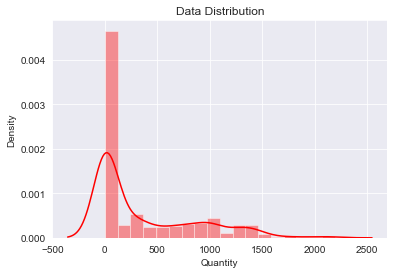

In [531]:
sns.distplot(df_Ire.Quantity, hist=True, color="r", label="Fitted Values")


plt.title('Data Distribution')

plt.show()
plt.close()
sns.set_style("darkgrid")

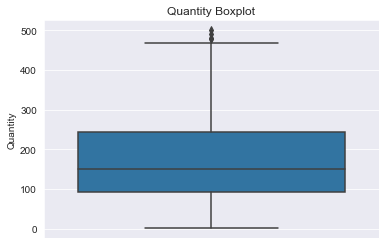

In [532]:
sns.boxplot(y=df_Ire_cattle.Quantity); #boxplot graph showing the quantity of outliers present in our data
plt.title('Quantity Boxplot')
sns.set_style("darkgrid")

In [533]:
df_Ire_cattle.groupby(['Year'],sort = False)['Quantity'].sum().reset_index()

,Year,Quantity
0,1991,6732.1
1,1992,6682.3
2,1993,6682.6
3,1994,6690.8
4,1995,6692.8
5,1996,6953.5
6,1997,7145.1
7,1998,7284.5
8,1999,7056.9
9,2000,6705.5


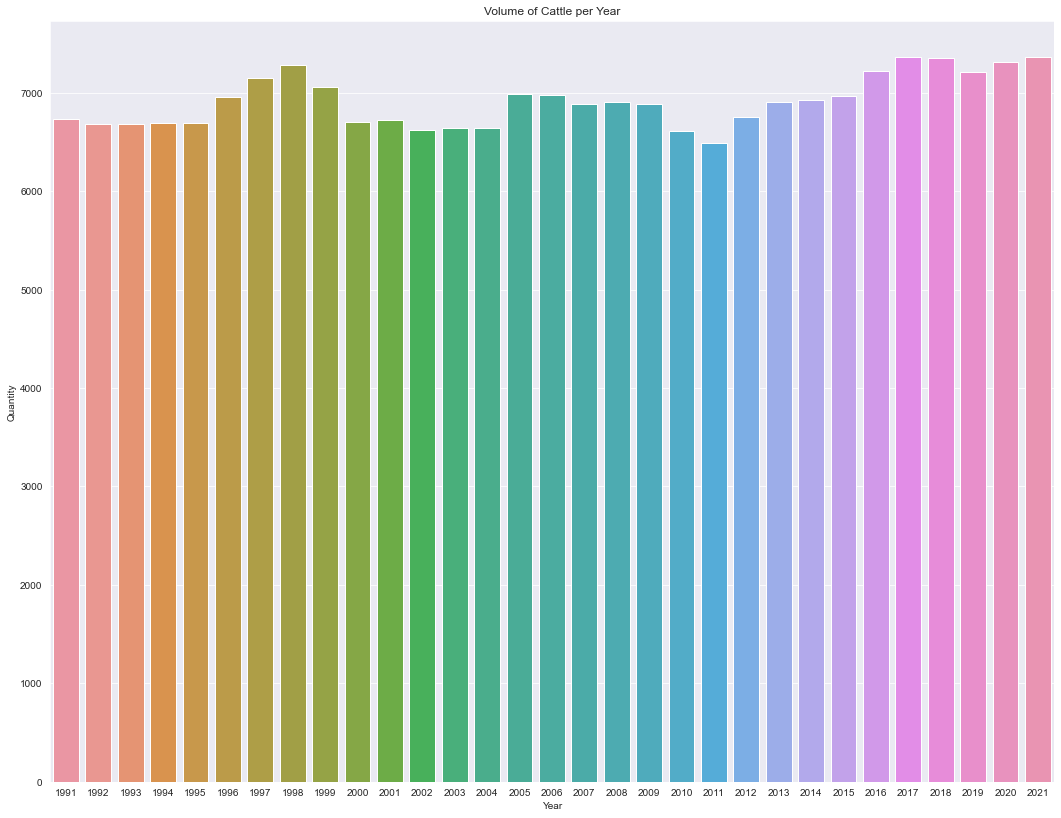

In [534]:
plt.figure(figsize=(18,14))
ax = sns.barplot(x = 'Year', y = 'Quantity', ci = None, data = df_Ire_cattle, estimator=sum)
plt.title('Volume of Cattle per Year')
sns.set_style("darkgrid")

In [535]:
df_Ire_weather.Region.unique()

array(['South-East', 'Border', 'Mid-West', 'South-West',
       'Dublin plus Mid East', 'West', 'Midland'], dtype=object)

In [536]:
df_Ire_cattle.Region.unique()

array(['Border', 'Midland', 'West', 'Dublin plus Mid East', 'Mid-West',
       'South-East', 'South-West'], dtype=object)

In [537]:
df_Ire_cattle = pd.merge(df_Ire_cattle, df_Ire_weather, how="inner", on=["Region","Year"])

In [538]:
glimpse(df_Ire_cattle)

1302 rows and 6 columns


,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation
0,Border,Dairy cows,1991,137.0,8.916,1140.468
1,Border,Other cows,1991,164.5,8.916,1140.468
2,Border,Bulls,1991,2.9,8.916,1140.468
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468


,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation
1297,Midland,Other cows,2021,117.8,9.745,955.885
1298,Midland,Bulls,2021,5.6,9.745,955.885
1299,Midland,Cattle: 2 years and over,2021,104.6,9.745,955.885
1300,Midland,Cattle: 1-2 years,2021,257.6,9.745,955.885
1301,Midland,Cattle: under 1 year,2021,255.2,9.745,955.885


In [539]:
df_Ire_cattle.corr()

,Year,Quantity,Mean_Temperature,Precipitation
Year,1.000000,0.029796,0.096218,0.112667
Quantity,0.029796,1.000000,0.185235,0.217688
Mean_Temperature,0.096218,0.185235,1.000000,0.174833
Precipitation,0.112667,0.217688,0.174833,1.000000


In [540]:
encoder = OneHotEncoder(sparse = False) #use OneHotEncoder to translate regions categorical data
region_reshaped = np.array(df_Ire_cattle['Region']).reshape(-1, 1)
region_values = encoder.fit_transform(region_reshaped)

In [541]:
encoder.get_feature_names_out()

array(['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],
      dtype=object)

In [542]:
region_df = pd.DataFrame(region_values, columns=['x0_Border', 'x0_Dublin plus Mid East', 'x0_Mid-West',
       'x0_Midland', 'x0_South-East', 'x0_South-West', 'x0_West'],dtype = 'int8')

In [543]:
glimpse(region_df)

1302 rows and 7 columns


,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,1,0,0,0,0,0,0
1,1,0,0,0,0,0,0
2,1,0,0,0,0,0,0
3,1,0,0,0,0,0,0
4,1,0,0,0,0,0,0


,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
1297,0,0,0,1,0,0,0
1298,0,0,0,1,0,0,0
1299,0,0,0,1,0,0,0
1300,0,0,0,1,0,0,0
1301,0,0,0,1,0,0,0


In [544]:
df_Ire_cattle = df_Ire_cattle.reset_index()
df_Ire_cattle = df_Ire_cattle.join(region_df) #join encoded region database with the main database
df_Ire_cattle = df_Ire_cattle.drop(['index'], axis=1)

In [545]:
df_Ire_cattle.head()

,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
0,Border,Dairy cows,1991,137.0,8.916,1140.468,1,0,0,0,0,0,0
1,Border,Other cows,1991,164.5,8.916,1140.468,1,0,0,0,0,0,0
2,Border,Bulls,1991,2.9,8.916,1140.468,1,0,0,0,0,0,0
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468,1,0,0,0,0,0,0
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468,1,0,0,0,0,0,0


In [546]:
df_Ire_cattle.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West
Year,1.000000e+00,0.029796,0.096218,0.112667,-1.402540e-16,-2.610010e-15,-5.203782e-15,1.348836e-14,-7.615671e-15,-1.211012e-14,1.305038e-14
Quantity,2.979598e-02,1.000000,0.185235,0.217688,-6.087362e-02,-2.353472e-01,6.868777e-02,-1.281884e-01,1.254362e-01,2.437852e-01,-1.350010e-02
Mean_Temperature,9.621773e-02,0.185235,1.000000,0.174833,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01
Precipitation,1.126675e-01,0.217688,0.174833,1.000000,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02
x0_Border,-1.402540e-16,-0.060874,-0.523651,0.234762,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Dublin plus Mid East,-2.610010e-15,-0.235347,-0.028617,-0.403259,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Mid-West,-5.203782e-15,0.068688,0.237451,0.017066,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_Midland,1.348836e-14,-0.128188,-0.166521,-0.372646,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01
x0_South-East,-7.615671e-15,0.125436,0.169566,-0.107502,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01
x0_South-West,-1.211012e-14,0.243785,0.413276,0.541867,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01


In [547]:
encoder = OneHotEncoder(sparse = False) #use OneHotEncoder to translate type of animals into categorical data
animal_reshaped = np.array(df_Ire_cattle['Type of Cattle']).reshape(-1, 1)
animal_values = encoder.fit_transform(animal_reshaped)

In [548]:
encoder.get_feature_names_out()

array(['x0_Bulls', 'x0_Cattle: 1-2 years', 'x0_Cattle: 2 years and over',
       'x0_Cattle: under 1 year', 'x0_Dairy cows', 'x0_Other cows'],
      dtype=object)

In [549]:
animal_df = pd.DataFrame(animal_values, columns=['x0_Bulls', 'x0_Cattle: 1-2 years', 'x0_Cattle: 2 years and over',
       'x0_Cattle: under 1 year', 'x0_Dairy cows', 'x0_Other cows'],dtype = 'int8')

In [550]:
glimpse(animal_df)

1302 rows and 6 columns


,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
0,0,0,0,0,1,0
1,0,0,0,0,0,1
2,1,0,0,0,0,0
3,0,0,1,0,0,0
4,0,1,0,0,0,0


,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
1297,0,0,0,0,0,1
1298,1,0,0,0,0,0
1299,0,0,1,0,0,0
1300,0,1,0,0,0,0
1301,0,0,0,1,0,0


In [551]:
df_Ire_cattle = df_Ire_cattle.reset_index()
df_Ire_cattle = df_Ire_cattle.join(animal_df) #join encoded region database with the main database
df_Ire_cattle = df_Ire_cattle.drop(['index'], axis=1)

In [552]:
df_Ire_cattle.head()

,Region,Type of Cattle,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
0,Border,Dairy cows,1991,137.0,8.916,1140.468,1,0,0,0,0,0,0,0,0,0,0,1,0
1,Border,Other cows,1991,164.5,8.916,1140.468,1,0,0,0,0,0,0,0,0,0,0,0,1
2,Border,Bulls,1991,2.9,8.916,1140.468,1,0,0,0,0,0,0,1,0,0,0,0,0
3,Border,Cattle: 2 years and over,1991,128.8,8.916,1140.468,1,0,0,0,0,0,0,0,0,1,0,0,0
4,Border,Cattle: 1-2 years,1991,215.7,8.916,1140.468,1,0,0,0,0,0,0,0,1,0,0,0,0


In [553]:
df_Ire_cattle.corr()

,Year,Quantity,Mean_Temperature,Precipitation,x0_Border,x0_Dublin plus Mid East,x0_Mid-West,x0_Midland,x0_South-East,x0_South-West,x0_West,x0_Bulls,x0_Cattle: 1-2 years,x0_Cattle: 2 years and over,x0_Cattle: under 1 year,x0_Dairy cows,x0_Other cows
Year,1.000000e+00,0.029796,9.621773e-02,1.126675e-01,-1.402540e-16,-2.610010e-15,-5.203782e-15,1.348836e-14,-7.615671e-15,-1.211012e-14,1.305038e-14,-3.965082e-16,1.751799e-16,1.861286e-16,3.233461e-17,-1.651521e-16,-4.654751e-16
Quantity,2.979598e-02,1.000000,1.852354e-01,2.176879e-01,-6.087362e-02,-2.353472e-01,6.868777e-02,-1.281884e-01,1.254362e-01,2.437852e-01,-1.350010e-02,-6.461889e-01,3.200885e-01,-1.431717e-01,4.412912e-01,5.446024e-02,-2.647935e-02
Mean_Temperature,9.621773e-02,0.185235,1.000000e+00,1.748332e-01,-5.236512e-01,-2.861677e-02,2.374513e-01,-1.665212e-01,1.695663e-01,4.132755e-01,-1.015039e-01,-7.694918e-17,2.785282e-17,-3.516660e-18,2.151729e-17,3.267124e-17,-6.205937e-17
Precipitation,1.126675e-01,0.217688,1.748332e-01,1.000000e+00,2.347620e-01,-4.032590e-01,1.706577e-02,-3.726456e-01,-1.075023e-01,5.418674e-01,8.971168e-02,-3.715841e-17,-1.006035e-17,1.014149e-17,8.113189e-18,-6.247156e-18,-5.914515e-17
x0_Border,-1.402540e-16,-0.060874,-5.236512e-01,2.347620e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,9.846794e-17,-1.714352e-17,3.651426e-17,-5.868436e-17,1.432372e-17,8.255042e-17
x0_Dublin plus Mid East,-2.610010e-15,-0.235347,-2.861677e-02,-4.032590e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-3.606473e-17,-6.518214e-18,-2.919915e-17,-1.095223e-17,-2.349826e-18,-2.975084e-17
x0_Mid-West,-5.203782e-15,0.068688,2.374513e-01,1.706577e-02,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-6.228062e-17,3.003691e-17,-3.749506e-17,3.874148e-17,-3.606473e-17,-6.851276e-17
x0_Midland,1.348836e-14,-0.128188,-1.665212e-01,-3.726456e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-1.666667e-01,7.895417e-17,-3.759722e-17,3.236630e-17,-6.473261e-17,4.152041e-17,5.655930e-17
x0_South-East,-7.615671e-15,0.125436,1.695663e-01,-1.075023e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-1.666667e-01,-2.592982e-17,5.394384e-17,1.585622e-17,5.917476e-17,-7.928110e-18,-2.261963e-17
x0_South-West,-1.211012e-14,0.243785,4.132755e-01,5.418674e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,-1.666667e-01,1.000000e+00,-1.666667e-01,-6.908489e-17,-1.665312e-17,-1.064574e-17,2.255833e-17,-9.297139e-18,-3.784242e-17


In [554]:
#Function to calculate the SMAPE
def smape(act,forc):
    return 100/len(act) * np.sum(2 * np.abs(forc - act) / (np.abs(act) + np.abs(forc)))

In [555]:
# prepare database variables for Regression
y = df_Ire_cattle['Quantity']
X = df_Ire_cattle.drop(['Quantity','Region','Type of Cattle'],axis=1)

In [556]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 10)

In [557]:
param_grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': np.arange(3, 50), 
              'max_features': np.arange(1, 10),'random_state' : [10]}
# Create Decision Tree Regressor object
DTregressor = RandomizedSearchCV(DecisionTreeRegressor(),param_grid,
                                n_jobs = -2,cv = TimeSeriesSplit(n_splits = 20),random_state=10,n_iter = 5)

# Train Decision Tree Regressor
DTregressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
                   estimator=DecisionTreeRegressor(), n_iter=5, n_jobs=-2,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
                                        'random_state': [10]},
                   random_state=10)

In [558]:
y_pred_DTR = DTregressor.predict(X_test)

In [559]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DTR)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_DTR)))

R-squared of the model in training set is: 0.997030137416256
-----Test set statistics-----
R-squared of the model in test set is: 0.9417805218752514
Normalized Root mean squared error of the prediction is: 0.05068784148172982
Symmetric mean absolute percentage error of the prediction is: 10.52750280946965


In [560]:
cross_val_score(DTregressor, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

0.7231873687676311

In [561]:
DTregressor.best_estimator_

DecisionTreeRegressor(criterion='friedman_mse', max_depth=14, max_features=6,
                      random_state=10)

In [562]:
px.scatter(
     x=Y_test, y=y_pred_DTR, opacity=0.65,
    trendline='ols', trendline_color_override='darkorange',
    labels = dict(x = "Actual",y = "Prediction Decision Tree"), color_discrete_sequence=['orange'],
   title = "Actual vs Prediction Decision Tree"
).show()

In [172]:
param_grid = {'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson'], 'max_depth': np.arange(3, 50),
              'random_state' : [10],'n_estimators': np.arange(80, 100),'max_features': np.arange(5, 10) }
# Create Random Forest Regressor object
RFregressor = RandomizedSearchCV(RandomForestRegressor(),param_grid,n_jobs = -2, cv = TimeSeriesSplit(n_splits = 20),
                                 random_state=10,n_iter = 5)
RFregressor.fit(X_train, Y_train)

RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
                   estimator=RandomForestRegressor(), n_iter=5, n_jobs=-2,
                   param_distributions={'criterion': ['squared_error',
                                                      'friedman_mse',
                                                      'absolute_error',
                                                      'poisson'],
                                        'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36,
       37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                                        'max_features': array([5, 6, 7, 8, 9]),
                                        'n_estimators': array([80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96,
       97, 98, 99]),
                                        'random_state'

In [173]:
y_pred_random = RFregressor.predict(X_test)

In [174]:
print("R-squared of the model in training set is: {}".format(RFregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(RFregressor.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_random)))

R-squared of the model in training set is: 0.9970056784921664
-----Test set statistics-----
R-squared of the model in test set is: 0.9765223242793618
Normalized Root mean squared error of the prediction is: 0.032188237210654905
Symmetric mean absolute percentage error of the prediction is: 7.344590676489316


In [175]:
cross_val_score(RFregressor, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

0.7652047510822042

In [176]:
RFregressor.best_estimator_

RandomForestRegressor(criterion='friedman_mse', max_depth=28, max_features=9,
                      n_estimators=93, random_state=10)

In [177]:
px.scatter(
     x=Y_test, y=y_pred_random, opacity=0.65,
    trendline='ols', trendline_color_override='darkred',
    labels = dict(x = "Actual",y = "Prediction Random Forest"), color_discrete_sequence=['red'],
    title = "Actual vs Prediction Random Forest"
).show()

In [178]:
class MLPRegressor(KerasRegressor):

    def __init__(
        self,
        hidden_layer_sizes=(100, ),
        optimizer="adam",
        optimizer__learning_rate=1,
        epochs=200,
        verbose=0,
        validation_data='none',
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.hidden_layer_sizes = hidden_layer_sizes
        self.optimizer = optimizer
        self.epochs = epochs
        self.verbose = verbose

    def _keras_build_fn(self, compile_kwargs: Dict[str, Any]):
        model = keras.Sequential()
        inp = keras.layers.Input(shape=(self.n_features_in_))
        model.add(inp)
        for hidden_layer_size in self.hidden_layer_sizes:
            layer = keras.layers.Dense(hidden_layer_size, activation="relu")
            model.add(layer)
        out = keras.layers.Dense(1)
        model.add(out)
        model.compile(loss="mse", optimizer=compile_kwargs["optimizer"])
        return model

In [179]:
param_grid = {'optimizer':['adadelta', 'adamax', 'rmsprop','adam'],
              'random_state' : [10], 'epochs' : np.arange(5000, 10000) }
# Create Random Forest Regressor object
ANNregressor1 = RandomizedSearchCV(MLPRegressor(validation_data=(X_test, Y_test),random_state=10),
                            param_grid,n_jobs = -2, cv = TimeSeriesSplit(n_splits = 20),random_state=10,n_iter = 4)

In [180]:
ANNregressor1.fit(X_train, Y_train)

C:\Users\krist\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
                   estimator=MLPRegressor(batch_size=None, build_fn=None, callbacks=None, loss=None, metrics=None, model=None, random_state=10, run_eagerly=False, shuffle=True, validation_batch_size=None, validation_split=0.0, warm_start=False),
                   n_iter=4, n_jobs=-2,
                   param_distributions={'epochs': array([5000, 5001, 5002, ..., 9997, 9998, 9999]),
                                        'optimizer': ['adadelta', 'adamax',
                                                      'rmsprop', 'adam'],
                                        'random_state': [10]},
                   random_state=10)

In [181]:
ANNregressor1.get_params().keys()

dict_keys(['cv', 'error_score', 'estimator__model', 'estimator__build_fn', 'estimator__warm_start', 'estimator__random_state', 'estimator__optimizer', 'estimator__loss', 'estimator__metrics', 'estimator__batch_size', 'estimator__validation_batch_size', 'estimator__verbose', 'estimator__callbacks', 'estimator__validation_split', 'estimator__shuffle', 'estimator__run_eagerly', 'estimator__epochs', 'estimator__hidden_layer_sizes', 'estimator', 'n_iter', 'n_jobs', 'param_distributions', 'pre_dispatch', 'random_state', 'refit', 'return_train_score', 'scoring', 'verbose'])

In [182]:
y_pred_ANN1 = ANNregressor1.predict(X_test)

In [183]:
print("R-squared of the model in training set is: {}".format(ANNregressor1.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ANNregressor1.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_ANN1)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_ANN1)))

R-squared of the model in training set is: 0.9505035091813802
-----Test set statistics-----
R-squared of the model in test set is: 0.9460843147022346
Normalized Root mean squared error of the prediction is: 0.04877836152349505
Symmetric mean absolute percentage error of the prediction is: 17.03190299835364


In [184]:
cross_val_score(ANNregressor1, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

0.7721561125736511

In [187]:
ANNregressor1.best_estimator_

MLPRegressor(
	model=None
	build_fn=None
	warm_start=False
	random_state=10
	optimizer=adam
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=6822
	hidden_layer_sizes=(100,)
)

In [185]:
class MLPRegressor(KerasRegressor):

    def __init__(
        self,
        hidden_layer_sizes=(100, ),
        optimizer="adam",
        optimizer__learning_rate=.1,
        epochs=200,
        verbose=0,
        validation_data='none',
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.hidden_layer_sizes = hidden_layer_sizes
        self.optimizer = optimizer
        self.epochs = epochs
        self.verbose = verbose

    def _keras_build_fn(self, compile_kwargs: Dict[str, Any]):
        model = keras.Sequential()
        inp = keras.layers.Input(shape=(self.n_features_in_))
        model.add(inp)
        for hidden_layer_size in self.hidden_layer_sizes:
            layer = keras.layers.Dense(hidden_layer_size, activation="relu")
            model.add(layer)
        out = keras.layers.Dense(1)
        model.add(out)
        model.compile(loss="mse", optimizer=compile_kwargs["optimizer"])
        return model

In [199]:
param_grid = {'optimizer':['adadelta', 'adamax', 'rmsprop','adam'],
              'random_state' : [10], 'epochs' : np.arange(5000, 10000) }
# Create Random Forest Regressor object
ANNregressor01 = RandomizedSearchCV(MLPRegressor(validation_data=(X_test, Y_test),random_state=10),
                            param_grid,n_jobs = -2, cv = TimeSeriesSplit(n_splits = 20),random_state=10,n_iter = 4)

In [200]:
ANNregressor01.fit(X_train, Y_train)

C:\Users\krist\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
                   estimator=MLPRegressor(batch_size=None, build_fn=None, callbacks=None, loss=None, metrics=None, model=None, random_state=10, run_eagerly=False, shuffle=True, validation_batch_size=None, validation_split=0.0, warm_start=False),
                   n_iter=4, n_jobs=-2,
                   param_distributions={'epochs': array([5000, 5001, 5002, ..., 9997, 9998, 9999]),
                                        'optimizer': ['adadelta', 'adamax',
                                                      'rmsprop', 'adam'],
                                        'random_state': [10]},
                   random_state=10)

In [201]:
y_pred_ANN01 = ANNregressor01.predict(X_test)

In [202]:
print("R-squared of the model in training set is: {}".format(ANNregressor01.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ANNregressor01.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_ANN01)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_ANN01)))

R-squared of the model in training set is: 0.9505035091813802
-----Test set statistics-----
R-squared of the model in test set is: 0.9460843147022346
Normalized Root mean squared error of the prediction is: 0.04877836152349505
Symmetric mean absolute percentage error of the prediction is: 17.03190299835364


In [203]:
cross_val_score(ANNregressor01, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

0.7721561125736511

In [220]:
class MLPRegressor(KerasRegressor):

    def __init__(
        self,
        hidden_layer_sizes=(100, ),
        optimizer="adam",
        optimizer__learning_rate=.01,
        epochs=200,
        verbose=0,
        validation_data='none',
        **kwargs,
    ):
        super().__init__(**kwargs)
        self.hidden_layer_sizes = hidden_layer_sizes
        self.optimizer = optimizer
        self.epochs = epochs
        self.verbose = verbose

    def _keras_build_fn(self, compile_kwargs: Dict[str, Any]):
        model = keras.Sequential()
        inp = keras.layers.Input(shape=(self.n_features_in_))
        model.add(inp)
        for hidden_layer_size in self.hidden_layer_sizes:
            layer = keras.layers.Dense(hidden_layer_size, activation="relu")
            model.add(layer)
        out = keras.layers.Dense(1)
        model.add(out)
        model.compile(loss="mse", optimizer=compile_kwargs["optimizer"])
        return model

In [221]:
param_grid = {'optimizer':['adadelta', 'adamax', 'rmsprop','adam'],
              'random_state' : [10], 'epochs' : np.arange(5000, 10000) }
# Create Random Forest Regressor object
ANNregressor001 = RandomizedSearchCV(MLPRegressor(validation_data=(X_test, Y_test),random_state=10),
                            param_grid,n_jobs = -2, cv = TimeSeriesSplit(n_splits = 20),random_state=10,n_iter = 4)

In [222]:
ANNregressor001.fit(X_train, Y_train)

C:\Users\krist\anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:702: UserWarning:

A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.



RandomizedSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=20, test_size=None),
                   estimator=MLPRegressor(batch_size=None, build_fn=None, callbacks=None, loss=None, metrics=None, model=None, random_state=10, run_eagerly=False, shuffle=True, validation_batch_size=None, validation_split=0.0, warm_start=False),
                   n_iter=4, n_jobs=-2,
                   param_distributions={'epochs': array([5000, 5001, 5002, ..., 9997, 9998, 9999]),
                                        'optimizer': ['adadelta', 'adamax',
                                                      'rmsprop', 'adam'],
                                        'random_state': [10]},
                   random_state=10)

In [223]:
y_pred_ANN001 = ANNregressor001.predict(X_test)

In [224]:
print("R-squared of the model in training set is: {}".format(ANNregressor001.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ANNregressor001.score(X_test, Y_test)))
print("Normalized Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_ANN001)**(1/2)/(y.max() - y.min())))
print("Symmetric mean absolute percentage error of the prediction is: {}".format(smape(Y_test, y_pred_ANN001)))

R-squared of the model in training set is: 0.9505035091813802
-----Test set statistics-----
R-squared of the model in test set is: 0.9460843147022346
Normalized Root mean squared error of the prediction is: 0.04877836152349505
Symmetric mean absolute percentage error of the prediction is: 17.03190299835364


In [225]:
cross_val_score(ANNregressor001, X, y, n_jobs = -2,cv = TimeSeriesSplit(n_splits = 5)).mean()

0.7720446588068504

In [226]:
# the chosen 1 is with .1 learning_rate as it has the highest cross_val score

ANNregressor = ANNregressor01
y_pred_ANN = y_pred_ANN01

In [227]:
ANNregressor.best_estimator_

MLPRegressor(
	model=None
	build_fn=None
	warm_start=False
	random_state=10
	optimizer=adam
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=0
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=6822
	hidden_layer_sizes=(100,)
)

In [228]:
scores = ANNregressor.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_random_state,param_optimizer,param_epochs,params,split0_test_score,split1_test_score,...,split13_test_score,split14_test_score,split15_test_score,split16_test_score,split17_test_score,split18_test_score,split19_test_score,mean_test_score,std_test_score,rank_test_score
0,541.663700,270.831943,0.795900,0.141404,10,adamax,9418,"{'random_state': 10, 'optimizer': 'adamax', 'e...",0.431289,0.716398,...,0.947451,0.928019,0.937890,0.949921,0.954377,0.950275,0.937549,0.843161,0.132977,2
1,388.190801,185.569564,0.714001,0.064443,10,adamax,6823,"{'random_state': 10, 'optimizer': 'adamax', 'e...",0.462921,0.714071,...,0.943378,0.884115,0.940680,0.957980,0.954076,0.941976,0.923650,0.817926,0.128449,3
2,524.828000,254.637111,0.769751,0.114194,10,adadelta,9432,"{'random_state': 10, 'optimizer': 'adadelta', ...",-0.049972,-0.031436,...,0.009167,0.005186,0.003830,0.034504,0.138867,0.132577,0.134339,0.038662,0.061228,4
3,381.601245,164.043913,0.621279,0.223383,10,adam,6822,"{'random_state': 10, 'optimizer': 'adam', 'epo...",0.292241,0.726186,...,0.956625,0.948131,0.927084,0.969146,0.959747,0.959812,0.938585,0.874694,0.145962,1


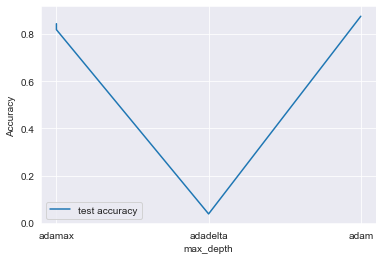

In [215]:
# plotting accuracies with optimizer
plt.figure()
plt.plot(scores["param_optimizer"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [216]:
px.scatter(
     x=Y_test, y=y_pred_ANN, opacity=0.65,
    trendline='ols', trendline_color_override='darkred',
    labels = dict(x = "Actual",y = "Prediction ANN"), color_discrete_sequence=['red'],
    title = "Actual vs Prediction ANN"
).show()

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



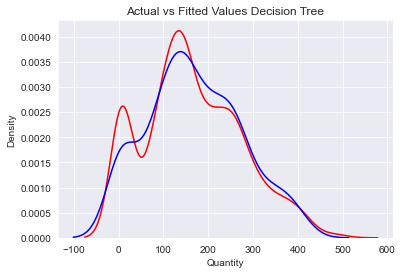

In [217]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_DTR, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values Decision Tree')

plt.show()
plt.close()

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



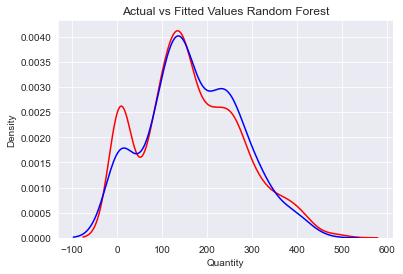

In [218]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_random, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values Random Forest')

plt.show()
plt.close()

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

C:\Users\krist\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



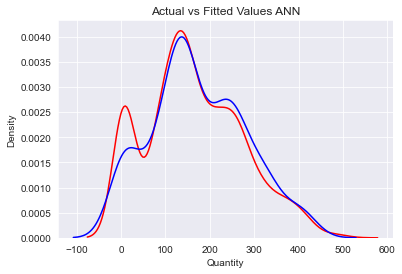

In [219]:
ax1 = sns.distplot(df_Ire_cattle['Quantity'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_ANN, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Values ANN')

plt.show()
plt.close()

In [229]:
pred_df=pd.DataFrame({'Actual Value':Y_test,'PV Tree':y_pred_DTR,'PV Random':y_pred_random,
                      'PV ANN':y_pred_ANN,'Abs Difference Value Tree':(abs(Y_test-y_pred_DTR)),'Abs Difference Value Random':(abs(Y_test-y_pred_random)),
                     'Abs Difference Value ANN':(abs(Y_test-y_pred_ANN))})

In [233]:
pred_df.sample(10)

,Actual Value,PV Tree,PV Random,PV ANN,Abs Difference Value Tree,Abs Difference Value Random,Abs Difference Value ANN
477,172.1,152.60,152.779570,139.095444,19.50,19.320430,33.004556
48,123.0,129.30,127.781720,125.884010,6.30,4.781720,2.884010
212,4.8,7.20,7.110753,11.064784,2.40,2.310753,6.264784
1254,129.3,118.90,109.773118,96.073807,10.40,19.526882,33.226193
261,171.8,165.10,151.824731,114.396118,6.70,19.975269,57.403882
124,216.4,227.70,232.908602,222.332703,11.30,16.508602,5.932703
521,366.1,387.20,367.426882,396.269226,21.10,1.326882,30.169226
267,158.1,142.00,142.500000,117.809731,16.10,15.600000,40.290269
1014,55.8,48.95,59.395699,69.023590,6.85,3.595699,13.223590
374,9.1,9.00,9.098925,6.746875,0.10,0.001075,2.353125


In [234]:
pred_df.tail()

,Actual Value,PV Tree,PV Random,PV ANN,Abs Difference Value Tree,Abs Difference Value Random,Abs Difference Value ANN
229,266.3,249.9,231.005376,231.688599,16.4,35.294624,34.611401
85,83.0,146.1,113.847312,132.971939,63.1,30.847312,49.971939
1002,416.2,362.1,405.575269,425.171570,54.1,10.624731,8.971570
1120,335.9,334.8,319.164516,319.506958,1.1,16.735484,16.393042
1026,219.6,269.9,245.198925,270.414368,50.3,25.598925,50.814368


In [268]:
pred_df.describe()

,Actual Value,PV Tree,PV Random,PV ANN,Abs Difference Value Tree,Abs Difference Value Random,Abs Difference Value ANN
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,169.794636,168.980886,169.827747,174.363815,15.358581,10.779957,18.208817
std,104.985584,104.461069,101.618868,106.114326,20.122133,11.921236,16.168517
min,2.800000,1.700000,2.945161,-2.942285,0.000000,0.001075,0.061326
25%,99.200000,94.166667,105.834409,107.101761,2.400000,2.413978,5.812038
50%,157.300000,159.212500,152.829032,146.014267,8.000000,8.265591,14.514267
75%,243.000000,244.900000,244.443011,247.659576,19.500000,14.563441,25.642125
max,465.100000,411.100000,435.967742,425.171570,147.500000,87.129032,117.358133


In [237]:
from dotenv import dotenv_values

config = dotenv_values(".env")

In [238]:
config["API_KEY"]

'MDfrcGX0ovMxveLLxhN2c3lQp'

In [267]:
import requests
import json

bearer_token = config["BEARER_TOKEN"]

search_url = "https://api.twitter.com/2/tweets/search/recent"

query_params = {
#     'query' : "\"Moon landing\""
    'query' : '"Cattle" Ireland -is:retweet lang:en',
    'max_results' : "50",
    'tweet.fields': 'id,text,geo,conversation_id,created_at',
    'user.fields': 'id,name,username,location',
    'place.fields': 'full_name,country',
#     'next_token' : 'b26v89c19zqg8o3fqk0zknbt6j4akzvn71nbscgsfxh8d'
}

def bearer_oauth(r):
    r.headers["Authorization"] = f"Bearer {bearer_token}"
    r.headers["User-Agent"] = "v2RecentSearchPython"
    return r

def connect_to_endpoint(url, params):
    response = requests.get(url, auth=bearer_oauth, params=params)
    return response.json()

json_response = connect_to_endpoint(search_url, query_params)

parsedResponse = json.dumps(json_response, indent=4, ensure_ascii=False)
print(parsedResponse)

{
    "data": [
        {
            "created_at": "2023-01-01T20:58:40.000Z",
            "conversation_id": "1609196812463661062",
            "text": "@LiamK1916 @murrirl @eoinyk Where all we exported was cattle and people! You can stick the old Ireland where the sun doesn’t shine",
            "id": "1609655369265221632",
            "edit_history_tweet_ids": [
                "1609655369265221632"
            ]
        },
        {
            "geo": {
                "place_id": "4ec01c9dbc693497"
            },
            "created_at": "2023-01-01T15:56:22.000Z",
            "conversation_id": "1608653745839308803",
            "text": "@stefen_robinson @FDGenetics In Ireland the offer of help is always genuine . The majority of Irish people grew up around cattle , sheep and horses . They do want “a look around “ . They know what a day of pushing cattle looks like . They have been at it since they were old enough to stand in a gate way 🥹",
            "id": "160957929338164838

In [563]:
df_world_cattle = pd.read_excel('cattle 1991-2021 Europe.xlsx', sheet_name = 'Sheet 1',skiprows=9, usecols = ['TIME','1991','1992','1993',
        '1994','1995','1996','1997','1998','1999','2000','2001','2002','2003','2004','2005','2006','2007','2008','2009','2010',
        '2011','2012','2013','2014','2015','2016','2017','2018','2019','2020','2021'],skipfooter = 8)

In [564]:
glimpse(df_world_cattle)

43 rows and 32 columns


,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,GEO (Labels),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,European Union - 27 countries (from 2020),:,:,:,:,:,:,:,:,:,...,77547.95,78019.23,78690.25,79302.79,79697.54,79009.94,77840.10,77161.16,76498.6,75655.2
2,European Union - 28 countries (2013-2020),:,:,:,:,:,:,:,:,:,...,87296.95,87701.23,88383.25,89118.79,89503.54,88796.94,87450.10,86620.16,:,:
3,European Union - 27 countries (2007-2013),:,:,:,:,:,:,:,:,:,...,86844.95,87259.23,87942.25,88677.79,89059.54,88345.94,87036.10,86200.16,:,:
4,European Union - 25 countries (2004-2006),:,:,:,:,:,:,:,:,:,...,84300.52,84651.28,85310.98,86024.34,86439.70,85781.91,84516.78,83749.66,:,:


,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
38,Albania,:,:,:,:,:,:,:,:,:,...,:,:,499.69,505.77,496.99,475.22,467.32,415.61,362.58,336.78
39,Serbia,:,:,:,:,:,:,:,:,:,...,921,913,920,916.00,893.00,899.00,878.00,898.00,886,860
40,Türkiye,:,:,:,:,:,:,:,:,:,...,14022.35,14532.85,14244.67,14127.84,14222.23,16105.03,17220.90,17872.33,18157.97,18036.12
41,Bosnia and Herzegovina,:,:,:,:,:,:,:,:,:,...,446,447,444,455.00,455.00,445.00,438.00,430.00,427,:
42,Kosovo (under United Nations Security Council ...,:,:,:,:,:,:,:,:,:,...,:,:,261.69,258.50,264.97,259.73,259.73,257.73,261.39,260.53


In [565]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    43 non-null     object 
 1   1991    42 non-null     object 
 2   1992    42 non-null     object 
 3   1993    42 non-null     object 
 4   1994    42 non-null     object 
 5   1995    42 non-null     object 
 6   1996    42 non-null     object 
 7   1997    42 non-null     object 
 8   1998    42 non-null     object 
 9   1999    42 non-null     object 
 10  2000    42 non-null     object 
 11  2001    42 non-null     object 
 12  2002    42 non-null     object 
 13  2003    42 non-null     object 
 14  2004    42 non-null     object 
 15  2005    42 non-null     object 
 16  2006    42 non-null     object 
 17  2007    42 non-null     object 
 18  2008    42 non-null     object 
 19  2009    42 non-null     object 
 20  2010    42 non-null     object 
 21  2011    42 non-null     object 
 22  2012

In [566]:
df_world_cattle = df_world_cattle.dropna()

In [567]:
df_world_cattle.head()

,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,European Union - 27 countries (from 2020),:,:,:,:,:,:,:,:,:,...,77547.95,78019.23,78690.25,79302.79,79697.54,79009.94,77840.10,77161.16,76498.6,75655.2
2,European Union - 28 countries (2013-2020),:,:,:,:,:,:,:,:,:,...,87296.95,87701.23,88383.25,89118.79,89503.54,88796.94,87450.10,86620.16,:,:
3,European Union - 27 countries (2007-2013),:,:,:,:,:,:,:,:,:,...,86844.95,87259.23,87942.25,88677.79,89059.54,88345.94,87036.10,86200.16,:,:
4,European Union - 25 countries (2004-2006),:,:,:,:,:,:,:,:,:,...,84300.52,84651.28,85310.98,86024.34,86439.70,85781.91,84516.78,83749.66,:,:
5,European Union - 15 countries (1995-2004),:,:,:,84522.11,85047.8,84535.96,83498.17,82778.67,82584.88,...,74327.16,74565.58,75044.11,75661.10,75910.39,75175.58,73781.91,72924.81,:,:


In [568]:
nan_value = float("NaN")
df_world_cattle = df_world_cattle.replace(':',nan_value,regex = True)

In [569]:
df_world_cattle.head()

,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,European Union - 27 countries (from 2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,77547.95,78019.23,78690.25,79302.79,79697.54,79009.94,77840.10,77161.16,76498.6,75655.2
2,European Union - 28 countries (2013-2020),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,87296.95,87701.23,88383.25,89118.79,89503.54,88796.94,87450.10,86620.16,NaN,NaN
3,European Union - 27 countries (2007-2013),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,86844.95,87259.23,87942.25,88677.79,89059.54,88345.94,87036.10,86200.16,NaN,NaN
4,European Union - 25 countries (2004-2006),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,84300.52,84651.28,85310.98,86024.34,86439.70,85781.91,84516.78,83749.66,NaN,NaN
5,European Union - 15 countries (1995-2004),NaN,NaN,NaN,84522.11,85047.8,84535.96,83498.17,82778.67,82584.88,...,74327.16,74565.58,75044.11,75661.10,75910.39,75175.58,73781.91,72924.81,NaN,NaN


In [570]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 1 to 42
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    42 non-null     object 
 1   1991    23 non-null     float64
 2   1992    23 non-null     float64
 3   1993    25 non-null     float64
 4   1994    27 non-null     float64
 5   1995    27 non-null     float64
 6   1996    27 non-null     float64
 7   1997    27 non-null     float64
 8   1998    27 non-null     float64
 9   1999    27 non-null     float64
 10  2000    28 non-null     float64
 11  2001    33 non-null     float64
 12  2002    33 non-null     float64
 13  2003    33 non-null     float64
 14  2004    33 non-null     float64
 15  2005    33 non-null     float64
 16  2006    34 non-null     float64
 17  2007    34 non-null     float64
 18  2008    34 non-null     float64
 19  2009    34 non-null     float64
 20  2010    35 non-null     float64
 21  2011    36 non-null     float64
 22  2012

In [571]:
df_world_cattle = df_world_cattle.dropna()

In [572]:
df_world_cattle

,TIME,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,Belgium,3105.51,3099.59,3084.22,3161.13,3158.69,3070.80,2978.44,2984.43,2970.43,...,2438.18,2441.32,2477.24,2503.26,2501.35,2385.99,2398.09,2373.10,2335.44,2310.44
7,Bulgaria,1336.00,996.00,768.00,652.00,645.00,593.00,622.30,681.70,690.90,...,535.32,585.55,562.36,561.04,570.14,552.92,542.12,527.19,588.91,611.20
8,Czechia,2950.00,2512.00,2161.00,2030.00,1989.00,1866.00,1701.00,1657.00,1574.00,...,1321.06,1332.08,1373.07,1366.33,1339.60,1366.36,1365.24,1367.05,1340.04,1359.42
9,Denmark,2222.00,2180.00,2115.00,2082.00,2094.00,2052.00,2026.00,1968.00,1976.00,...,1607.00,1583.00,1553.00,1566.00,1554.00,1558.00,1530.00,1500.00,1500.00,1480.00
10,Germany (until 1990 former territory of the FRG),17133.80,16207.34,15896.62,15962.23,15889.93,15759.50,15227.16,14942.02,14657.90,...,12506.77,12685.99,12742.19,12635.46,12466.59,12281.20,11949.09,11639.53,11301.86,11039.66
11,Estonia,708.30,614.60,463.20,419.50,370.40,343.00,325.60,307.50,267.30,...,246.00,261.40,264.70,256.20,248.20,250.90,251.90,254.00,253.30,250.80
12,Ireland,6147.36,6236.39,6263.89,6343.87,6450.64,6660.90,6881.63,6951.73,6557.89,...,6253.24,6309.05,6243.05,6422.23,6613.43,6673.59,6593.49,6559.65,6529.44,6649.31
13,Greece,631.00,629.00,608.00,520.18,550.00,593.00,597.00,579.00,652.00,...,685.00,653.00,659.00,582.00,554.00,556.00,542.00,530.00,579.00,564.00
14,Spain,5046.14,4961.52,5001.00,5234.00,5495.00,5905.00,5869.00,5966.00,6291.00,...,5812.61,5802.22,6078.73,6182.91,6317.64,6465.75,6510.59,6600.33,6636.43,6576.30
15,France,20970.00,20329.00,20099.00,20507.10,20836.50,20540.70,20334.20,20055.27,20216.03,...,19052.00,19095.80,19248.63,19386.52,19373.38,18953.58,18613.04,18172.97,17815.67,17330.08


In [573]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 6 to 30
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TIME    22 non-null     object 
 1   1991    22 non-null     float64
 2   1992    22 non-null     float64
 3   1993    22 non-null     float64
 4   1994    22 non-null     float64
 5   1995    22 non-null     float64
 6   1996    22 non-null     float64
 7   1997    22 non-null     float64
 8   1998    22 non-null     float64
 9   1999    22 non-null     float64
 10  2000    22 non-null     float64
 11  2001    22 non-null     float64
 12  2002    22 non-null     float64
 13  2003    22 non-null     float64
 14  2004    22 non-null     float64
 15  2005    22 non-null     float64
 16  2006    22 non-null     float64
 17  2007    22 non-null     float64
 18  2008    22 non-null     float64
 19  2009    22 non-null     float64
 20  2010    22 non-null     float64
 21  2011    22 non-null     float64
 22  2012

In [574]:
df_world_cattle.rename(columns = {'TIME':'Country'}, inplace = True)

In [575]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22 entries, 6 to 30
Data columns (total 32 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  22 non-null     object 
 1   1991     22 non-null     float64
 2   1992     22 non-null     float64
 3   1993     22 non-null     float64
 4   1994     22 non-null     float64
 5   1995     22 non-null     float64
 6   1996     22 non-null     float64
 7   1997     22 non-null     float64
 8   1998     22 non-null     float64
 9   1999     22 non-null     float64
 10  2000     22 non-null     float64
 11  2001     22 non-null     float64
 12  2002     22 non-null     float64
 13  2003     22 non-null     float64
 14  2004     22 non-null     float64
 15  2005     22 non-null     float64
 16  2006     22 non-null     float64
 17  2007     22 non-null     float64
 18  2008     22 non-null     float64
 19  2009     22 non-null     float64
 20  2010     22 non-null     float64
 21  2011     22 non-nu

In [576]:
df_world_cattle

,Country,1991,1992,1993,1994,1995,1996,1997,1998,1999,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
6,Belgium,3105.51,3099.59,3084.22,3161.13,3158.69,3070.80,2978.44,2984.43,2970.43,...,2438.18,2441.32,2477.24,2503.26,2501.35,2385.99,2398.09,2373.10,2335.44,2310.44
7,Bulgaria,1336.00,996.00,768.00,652.00,645.00,593.00,622.30,681.70,690.90,...,535.32,585.55,562.36,561.04,570.14,552.92,542.12,527.19,588.91,611.20
8,Czechia,2950.00,2512.00,2161.00,2030.00,1989.00,1866.00,1701.00,1657.00,1574.00,...,1321.06,1332.08,1373.07,1366.33,1339.60,1366.36,1365.24,1367.05,1340.04,1359.42
9,Denmark,2222.00,2180.00,2115.00,2082.00,2094.00,2052.00,2026.00,1968.00,1976.00,...,1607.00,1583.00,1553.00,1566.00,1554.00,1558.00,1530.00,1500.00,1500.00,1480.00
10,Germany (until 1990 former territory of the FRG),17133.80,16207.34,15896.62,15962.23,15889.93,15759.50,15227.16,14942.02,14657.90,...,12506.77,12685.99,12742.19,12635.46,12466.59,12281.20,11949.09,11639.53,11301.86,11039.66
11,Estonia,708.30,614.60,463.20,419.50,370.40,343.00,325.60,307.50,267.30,...,246.00,261.40,264.70,256.20,248.20,250.90,251.90,254.00,253.30,250.80
12,Ireland,6147.36,6236.39,6263.89,6343.87,6450.64,6660.90,6881.63,6951.73,6557.89,...,6253.24,6309.05,6243.05,6422.23,6613.43,6673.59,6593.49,6559.65,6529.44,6649.31
13,Greece,631.00,629.00,608.00,520.18,550.00,593.00,597.00,579.00,652.00,...,685.00,653.00,659.00,582.00,554.00,556.00,542.00,530.00,579.00,564.00
14,Spain,5046.14,4961.52,5001.00,5234.00,5495.00,5905.00,5869.00,5966.00,6291.00,...,5812.61,5802.22,6078.73,6182.91,6317.64,6465.75,6510.59,6600.33,6636.43,6576.30
15,France,20970.00,20329.00,20099.00,20507.10,20836.50,20540.70,20334.20,20055.27,20216.03,...,19052.00,19095.80,19248.63,19386.52,19373.38,18953.58,18613.04,18172.97,17815.67,17330.08


In [577]:
df_world_cattle.isna().sum().sum()

0

In [578]:
df_world_cattle.rename(columns = {'Country':'Year'}, inplace = True)
df_world_cattle = df_world_cattle.set_index('Year').T

In [579]:
df_world_cattle

Year,Belgium,Bulgaria,Czechia,Denmark,Germany (until 1990 former territory of the FRG),Estonia,Ireland,Greece,Spain,France,...,Latvia,Lithuania,Luxembourg,Hungary,Netherlands,Poland,Portugal,Romania,Slovenia,Slovakia
1991,3105.51,1336.00,2950.00,2222.0,17133.80,708.3,6147.36,631.00,5046.14,20970.00,...,1382.90,2196.6,205.06,1420.0,4876.00,8028.80,1398.00,4355.0,484.00,1398.00
1992,3099.59,996.00,2512.00,2180.0,16207.34,614.6,6236.39,629.00,4961.52,20329.00,...,1144.30,1701.0,201.64,1159.0,4794.00,7599.80,1336.00,3683.0,504.00,1181.00
1993,3084.22,768.00,2161.00,2115.0,15896.62,463.2,6263.89,608.00,5001.00,20099.00,...,677.90,1384.3,205.07,999.0,4629.00,7270.00,1348.41,3597.0,478.00,993.00
1994,3161.13,652.00,2030.00,2082.0,15962.23,419.5,6343.87,520.18,5234.00,20507.10,...,550.80,1152.4,203.71,910.0,4588.00,7120.00,1363.41,3481.0,477.00,916.00
1995,3158.69,645.00,1989.00,2094.0,15889.93,370.4,6450.64,550.00,5495.00,20836.50,...,537.10,1065.1,203.85,928.0,4545.00,7193.00,1386.41,3496.3,496.00,929.00
1996,3070.80,593.00,1866.00,2052.0,15759.50,343.0,6660.90,593.00,5905.00,20540.70,...,509.40,1054.1,209.21,909.0,4366.00,6958.10,1389.41,3434.9,486.00,892.00
1997,2978.44,622.30,1701.00,2026.0,15227.16,325.6,6881.63,597.00,5869.00,20334.20,...,476.90,1016.3,205.19,871.0,4287.00,7028.80,1386.41,3235.4,445.70,803.00
1998,2984.43,681.70,1657.00,1968.0,14942.02,307.5,6951.73,579.00,5966.00,20055.27,...,434.40,922.8,201.77,873.0,4184.00,6455.20,1409.41,3142.7,453.10,705.00
1999,2970.43,690.90,1574.00,1976.0,14657.90,267.3,6557.89,652.00,6291.00,20216.03,...,378.40,897.8,202.75,857.0,4097.00,6092.60,1421.24,3051.1,471.43,665.06
2000,3001.06,652.20,1582.00,1891.0,14567.74,252.8,6330.19,568.00,6163.89,20088.93,...,366.70,748.3,199.64,805.0,3890.00,5723.00,1396.86,2870.4,493.67,646.15


In [580]:
df_world_cattle.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31 entries, 1991 to 2021
Data columns (total 22 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Belgium                                           31 non-null     float64
 1   Bulgaria                                          31 non-null     float64
 2   Czechia                                           31 non-null     float64
 3   Denmark                                           31 non-null     float64
 4   Germany (until 1990 former territory of the FRG)  31 non-null     float64
 5   Estonia                                           31 non-null     float64
 6   Ireland                                           31 non-null     float64
 7   Greece                                            31 non-null     float64
 8   Spain                                             31 non-null     float64
 9   France                 

In [582]:
df_world_cattle.rename(columns = {'Germany (until 1990 former territory of the FRG)':'Germany'}, inplace = True)

In [583]:
df_world_cattle

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Latvia,Lithuania,Luxembourg,Hungary,Netherlands,Poland,Portugal,Romania,Slovenia,Slovakia
1991,3105.51,1336.00,2950.00,2222.0,17133.80,708.3,6147.36,631.00,5046.14,20970.00,...,1382.90,2196.6,205.06,1420.0,4876.00,8028.80,1398.00,4355.0,484.00,1398.00
1992,3099.59,996.00,2512.00,2180.0,16207.34,614.6,6236.39,629.00,4961.52,20329.00,...,1144.30,1701.0,201.64,1159.0,4794.00,7599.80,1336.00,3683.0,504.00,1181.00
1993,3084.22,768.00,2161.00,2115.0,15896.62,463.2,6263.89,608.00,5001.00,20099.00,...,677.90,1384.3,205.07,999.0,4629.00,7270.00,1348.41,3597.0,478.00,993.00
1994,3161.13,652.00,2030.00,2082.0,15962.23,419.5,6343.87,520.18,5234.00,20507.10,...,550.80,1152.4,203.71,910.0,4588.00,7120.00,1363.41,3481.0,477.00,916.00
1995,3158.69,645.00,1989.00,2094.0,15889.93,370.4,6450.64,550.00,5495.00,20836.50,...,537.10,1065.1,203.85,928.0,4545.00,7193.00,1386.41,3496.3,496.00,929.00
1996,3070.80,593.00,1866.00,2052.0,15759.50,343.0,6660.90,593.00,5905.00,20540.70,...,509.40,1054.1,209.21,909.0,4366.00,6958.10,1389.41,3434.9,486.00,892.00
1997,2978.44,622.30,1701.00,2026.0,15227.16,325.6,6881.63,597.00,5869.00,20334.20,...,476.90,1016.3,205.19,871.0,4287.00,7028.80,1386.41,3235.4,445.70,803.00
1998,2984.43,681.70,1657.00,1968.0,14942.02,307.5,6951.73,579.00,5966.00,20055.27,...,434.40,922.8,201.77,873.0,4184.00,6455.20,1409.41,3142.7,453.10,705.00
1999,2970.43,690.90,1574.00,1976.0,14657.90,267.3,6557.89,652.00,6291.00,20216.03,...,378.40,897.8,202.75,857.0,4097.00,6092.60,1421.24,3051.1,471.43,665.06
2000,3001.06,652.20,1582.00,1891.0,14567.74,252.8,6330.19,568.00,6163.89,20088.93,...,366.70,748.3,199.64,805.0,3890.00,5723.00,1396.86,2870.4,493.67,646.15


In [586]:
df_world_cattle.describe()

Year,Belgium,Bulgaria,Czechia,Denmark,Germany,Estonia,Ireland,Greece,Spain,France,...,Latvia,Lithuania,Luxembourg,Hungary,Netherlands,Poland,Portugal,Romania,Slovenia,Slovakia
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,2697.565161,650.015161,1574.484839,1744.258065,13589.992258,300.512903,6393.654194,614.225806,6075.483226,19509.206774,...,474.282258,888.748387,196.300968,844.025806,4069.892258,6090.164194,1486.036774,2689.848387,473.259032,626.395806
std,284.204662,156.713170,388.068320,238.302604,1606.089307,111.350868,235.139880,53.412593,493.787211,862.764326,...,223.137949,334.700090,7.212632,151.425449,344.065525,767.591912,104.065301,666.136082,14.717254,243.607579
min,2310.440000,527.190000,1319.410000,1480.000000,11039.660000,234.700000,5917.700000,520.180000,4961.520000,17330.080000,...,366.700000,628.700000,184.250000,682.000000,3673.000000,5200.170000,1336.000000,1826.800000,445.700000,432.250000
25%,2474.420000,564.945000,1356.690000,1562.000000,12581.650000,249.000000,6245.315000,566.000000,5887.000000,19002.790000,...,380.420000,725.900000,190.270000,731.000000,3769.500000,5510.645000,1403.705000,2016.750000,461.440000,464.450000
50%,2603.560000,611.200000,1367.600000,1616.000000,12918.640000,253.900000,6340.160000,613.000000,6163.890000,19386.520000,...,395.330000,770.900000,198.070000,821.000000,3996.000000,5762.500000,1470.500000,2808.100000,476.810000,507.820000
75%,2981.435000,665.875000,1619.500000,1972.000000,14799.960000,287.400000,6558.770000,662.080000,6471.825000,20157.515000,...,428.210000,910.300000,202.090000,909.000000,4290.500000,6416.950000,1533.860000,3096.900000,483.535000,685.030000
max,3161.130000,1336.000000,2950.000000,2222.000000,17133.800000,708.300000,6951.730000,685.000000,6653.090000,20970.000000,...,1382.900000,2196.600000,209.210000,1420.000000,4876.000000,8028.800000,1691.320000,4355.000000,504.000000,1398.000000
